<a href="https://colab.research.google.com/github/Shubhankar0990/Internship_Submission/blob/main/final_internship_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
import itertools

import pandas as pd
import numpy as np
import seaborn as sns

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.api import Holt

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

import matplotlib.patches as patches
import seaborn as sns

import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import plotly.express as px
import plotly.graph_objs as go 
from plotly.offline import iplot

from math import sqrt

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.svm import SVR
import random
import warnings
warnings.filterwarnings("ignore")
import sklearn


from sklearn.metrics import make_scorer
from xgboost import XGBRegressor
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('bmh')

from datetime import datetime

import scipy.stats as stats

import calendar

import sqlite3
from itertools import cycle, islice

import xgboost as xgb
import lightgbm as lgb

# Import timedelta from datetime library
from datetime import timedelta


ss = StandardScaler()

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [ ]:
train=pd.read_csv("/content/drive/MyDrive/walmart data/train.csv/train.csv")
test=pd.read_csv("/content/drive/MyDrive/walmart data/test.csv/test.csv")
features=pd.read_csv("/content/drive/MyDrive/walmart data/features.csv/features.csv")
stores=pd.read_csv("/content/drive/MyDrive/walmart data/stores.csv")



---
EXPLORATORY DATA ANALYSIS




1) features.csv file


In [ ]:
features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [ ]:
#total number of rows &columns
features.shape


(8190, 12)


As we can see few column of features.csv file have more than 50% data missing.
Therefore we will drop these columns.

In [ ]:
#features = features.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1)
#features.head(5)

In [ ]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [ ]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
#Date is in string format changing data type
features['Date'] = pd.to_datetime(features['Date'])


2) stores.csv file


In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [ ]:
stores.shape

(45, 3)

In [ ]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
#Visualizing the Type of the Stores along with their percentage
labels = stores["Type"].value_counts()[:10].index
values = stores["Type"].value_counts()[:10].values

colors=stores["Type"]

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

Type A has the max number of store


Since features and stores have 'Store' as a common column lets merge the data

In [ ]:
# Using the merge function to merge, we are merging along the common column named Store
dataset = features.merge(stores, how='inner', on='Store')
dataset.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315



3)dataset 

In [ ]:
dataset.shape

(8190, 14)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Type          8190 non-null   object        
 13  Size          8190 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 903.8+ KB


In [ ]:
dataset.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,130287.600000
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,63115.971429
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,34875.000000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,70713.000000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,126512.000000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,202307.000000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,219622.000000


In [ ]:
#Visualizing the Type of the Stores along with their percentage in the dataset
labels = dataset["Type"].value_counts()[:10].index  # Taking the top 10 index
values = dataset["Type"].value_counts()[:10].values  # Taking the top 10 values

colors=dataset["Type"]

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

Type A has the maximum number of stores

In [ ]:
#let's encode the categorical column : IsHoliday

dataset['IsHoliday'] = dataset['IsHoliday'].apply(lambda x: 1 if x == True else 0)
# Will convert the bool to 1 and 0 for easier use later.


In [ ]:
# Now converting "Date"  to date time
dataset["Date"]=pd.to_datetime(dataset.Date)

# Extracting details from date given. so that can be used for seasonal checks or grouping

dataset["Day"]=dataset.Date.dt.day
dataset["Month"]=dataset.Date.dt.month
dataset["Year"]=dataset.Date.dt.year

# Changing the Months value from numbers to real values like Jan, Feb to Dec
dataset['Month'] = dataset['Month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
# Want to check the date column is in object format or datetime
dataset.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                int64
Type                    object
Size                     int64
Day                      int64
Month                   object
Year                     int64
dtype: object

4) test.csv file

In [ ]:
test.shape

(115064, 4)

In [ ]:
test.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [ ]:
#Date is in string format changing data type
test['Date'] = pd.to_datetime(test['Date'])

In [ ]:
# Now converting "Date"  to date time
test["Date"]=pd.to_datetime(test.Date)

# Extracting details from date given. so that can be used for seasonal checks or grouping

test["Day"]=test.Date.dt.day
test["Month"]=test.Date.dt.month
test["Year"]=test.Date.dt.year

# Changing the Months value from numbers to real values like Jan, Feb to Dec
test['Month'] = test['Month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
test.dtypes

Store                 int64
Dept                  int64
Date         datetime64[ns]
IsHoliday              bool
Day                   int64
Month                object
Year                  int64
dtype: object

5) train.csv file

In [ ]:
train.shape

(421570, 5)

In [ ]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
# Now converting "Date"  to date time
train["Date"]=pd.to_datetime(train.Date)

# Extracting details from date given. so that can be used for seasonal checks or grouping

train["Day"]=train.Date.dt.day
train["Month"]=train.Date.dt.month
train["Year"]=train.Date.dt.year

# Changing the Months value from numbers to real values like Jan, Feb to Dec
train['Month'] = train['Month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Day                      int64
Month                   object
Year                     int64
dtype: object



---
MERGING test.csv DATA WITH dataset.csv


In [ ]:
test_data = test.merge(dataset, how='inner', on=['Store', 'Date', 'IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)
test_data.head(5)

,Store,Dept,Date,IsHoliday,Day_x,Month_x,Year_x,Temperature,Fuel_Price,MarkDown1,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day_y,Month_y,Year_y
0,1,1,2012-11-02,False,2,Nov,2012,55.32,3.386,6766.44,...,50.82,3639.90,2737.42,223.462779,6.573,A,151315,2,Nov,2012
1,1,1,2012-11-09,False,9,Nov,2012,61.24,3.314,11421.32,...,40.28,4646.79,6154.16,223.481307,6.573,A,151315,9,Nov,2012
2,1,1,2012-11-16,False,16,Nov,2012,52.92,3.252,9696.28,...,103.78,1133.15,6612.69,223.512911,6.573,A,151315,16,Nov,2012
3,1,1,2012-11-23,True,23,Nov,2012,56.23,3.211,883.59,...,74910.32,209.91,303.32,223.561947,6.573,A,151315,23,Nov,2012
4,1,1,2012-11-30,False,30,Nov,2012,52.34,3.207,2460.03,...,3838.35,150.57,6966.34,223.610984,6.573,A,151315,30,Nov,2012


As,we can see we have 3 duplicate columns.First we will check if these column have same data if they do we will drop those columns and rename their respective duplicates.

In [ ]:
test_data['Day_x'].equals(test_data['Day_y'])
#if 'true' that means columns are exact same 


True

In [ ]:
test_data=test_data.drop(['Day_y'], axis=1)


In [ ]:
test_data['Month_x'].equals(test_data['Month_y'])
#if 'true' that means columns are exact same 

True

In [ ]:
test_data=test_data.drop(['Month_y'], axis=1)

In [ ]:
test_data['Year_x'].equals(test_data['Year_y'])
#if 'true' that means columns are exact same 

True

In [ ]:
test_data=test_data.drop(['Year_y'], axis=1)

In [ ]:
test_data.columns.values[4:7] =["Day", "Month","Year" ]
 

In [ ]:
#add a 'week' column to the dataset for further analysis
test_data['Week'] = test_data.Date.dt.isocalendar().week 

In [ ]:
test_data.head(2)

,Store,Dept,Date,IsHoliday,Day,Month,Year,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week
0,1,1,2012-11-02,False,2,Nov,2012,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44
1,1,1,2012-11-09,False,9,Nov,2012,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315,45




---
MERGING train.csv DATA WITH dataset.csv






In [ ]:
train_data = train.merge(dataset, how='inner', on=['Store', 'Date', 'IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)
train_data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Day_x,Month_x,Year_x,Temperature,Fuel_Price,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day_y,Month_y,Year_y
0,1,1,2010-02-05,24924.50,False,5,Feb,2010,42.31,2.572,...,NaN,NaN,NaN,211.096358,8.106,A,151315,5,Feb,2010
1,1,1,2010-02-12,46039.49,True,12,Feb,2010,38.51,2.548,...,NaN,NaN,NaN,211.242170,8.106,A,151315,12,Feb,2010
2,1,1,2010-02-19,41595.55,False,19,Feb,2010,39.93,2.514,...,NaN,NaN,NaN,211.289143,8.106,A,151315,19,Feb,2010
3,1,1,2010-02-26,19403.54,False,26,Feb,2010,46.63,2.561,...,NaN,NaN,NaN,211.319643,8.106,A,151315,26,Feb,2010
4,1,1,2010-03-05,21827.90,False,5,Mar,2010,46.50,2.625,...,NaN,NaN,NaN,211.350143,8.106,A,151315,5,Mar,2010


As,we can see we have 3 duplicate columns.First we will check if these column have same data if they do we will drop those columns and rename their respective duplicates.

In [ ]:
train_data['Day_x'].equals(train_data['Day_y'])
#if 'true' that means columns are exact same 

True

In [ ]:
train_data=train_data.drop(['Day_y'], axis=1)

In [ ]:
train_data['Month_x'].equals(train_data['Month_y'])
#if 'true' that means columns are exact same 

True

In [ ]:
train_data=train_data.drop(['Month_y'], axis=1)

In [ ]:
train_data['Year_x'].equals(train_data['Year_y'])
#if 'true' that means columns are exact same 

True

In [ ]:
train_data=train_data.drop(['Year_y'], axis=1)



In [ ]:
train_data.columns.values[5:8] =["Day", "Month","Year" ]

In [ ]:
#add a 'week' column to the dataset for further analysis
train_data['Week'] = train_data.Date.dt.isocalendar().week 

In [ ]:
train_data.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Day,Month,Year,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week
0,1,1,2010-02-05,24924.50,False,5,Feb,2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
1,1,1,2010-02-12,46039.49,True,12,Feb,2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6




---
**EDA** 
---
UNIVARIATE ANALYSIS



In [ ]:
#test_data
labels = test_data['IsHoliday'].value_counts().index # Taking the all index
values = test_data['IsHoliday'].value_counts().values  # Taking the all values

colors=test_data['IsHoliday']

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()


Plotting Scatter diagram for each column of train_data against 
'weekly_sales' column of train_data.csv

BIVARIATE ANALYSIS

In [ ]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

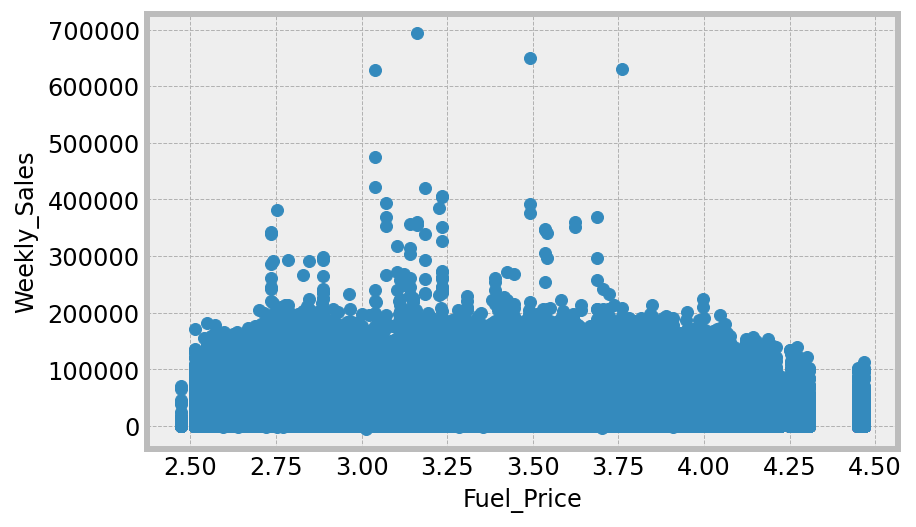

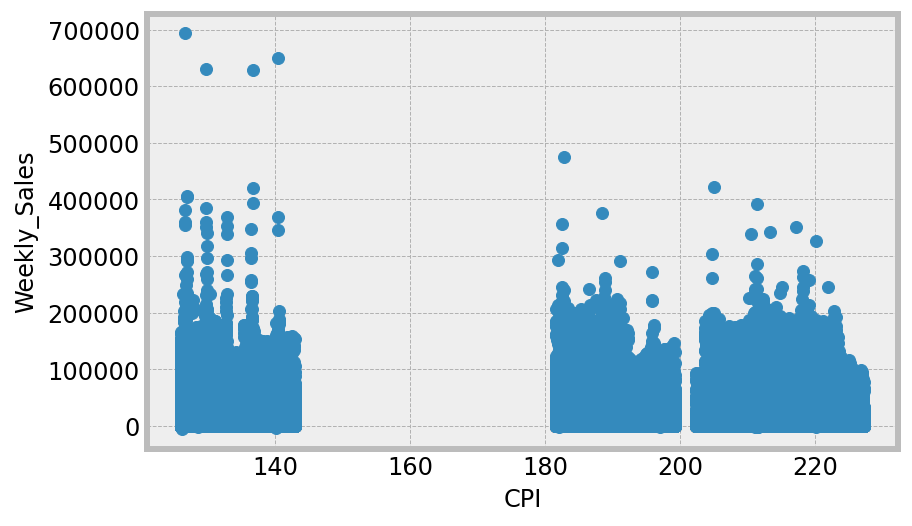

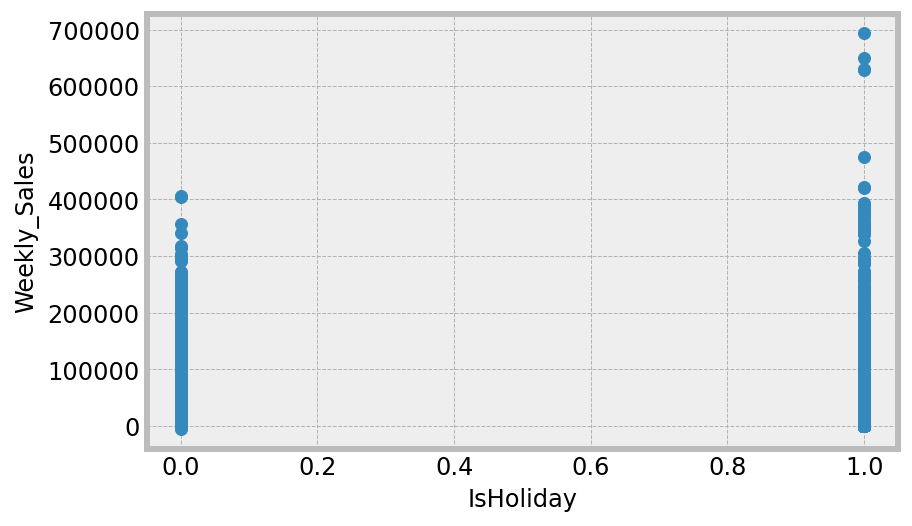

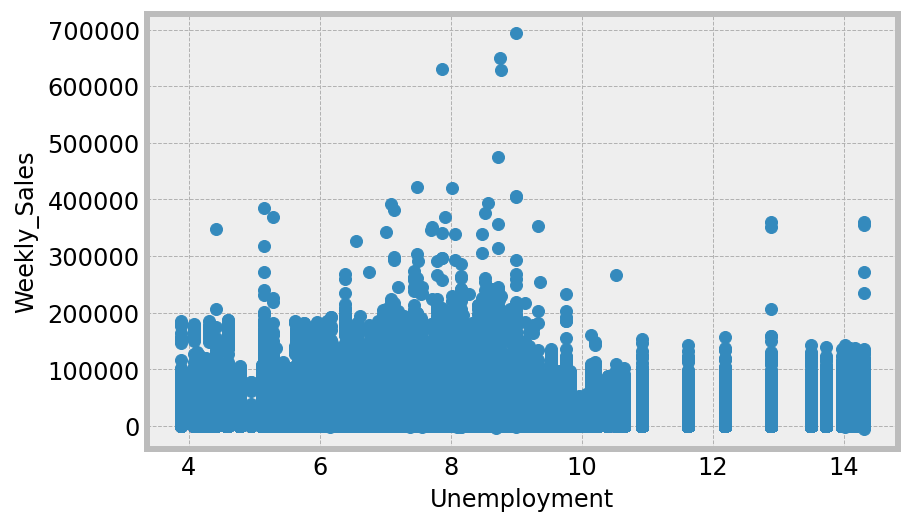

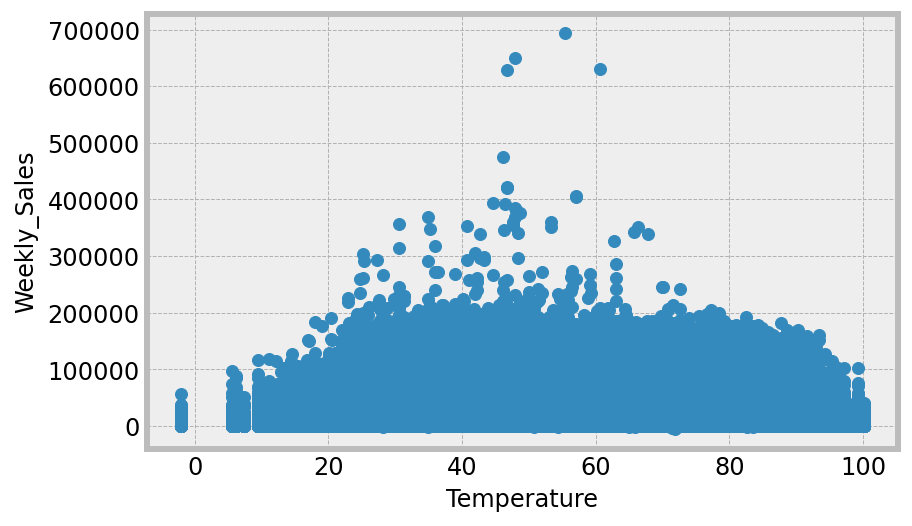

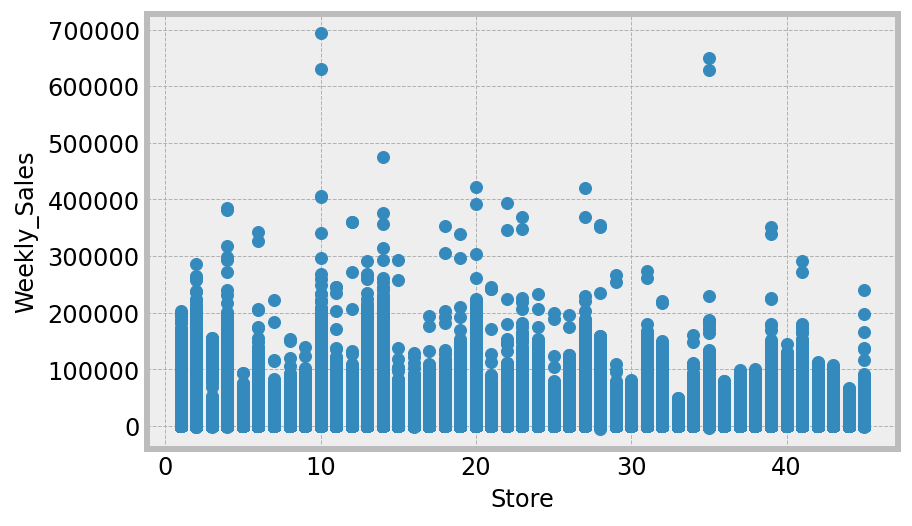

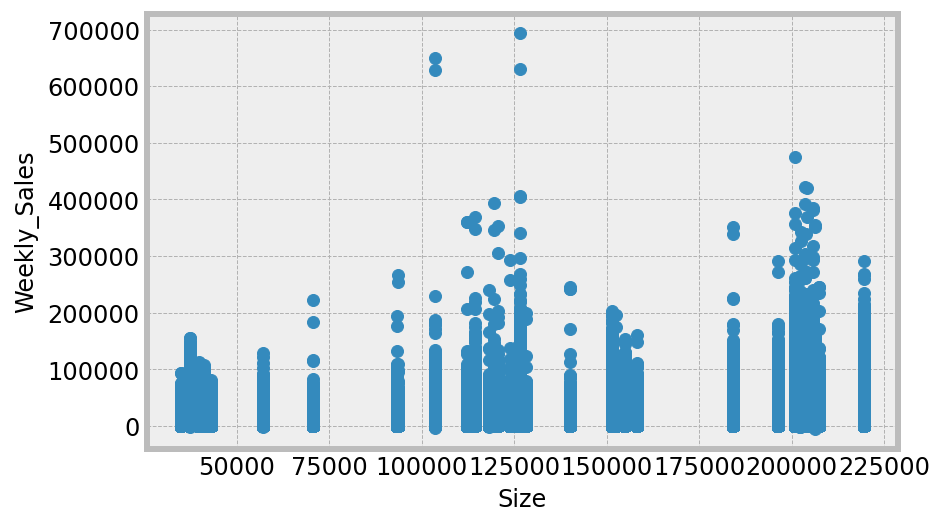

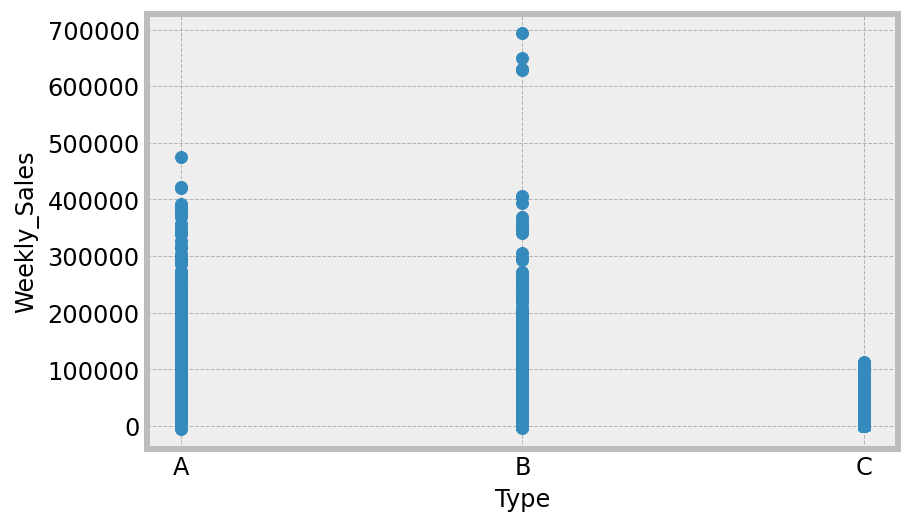

In [ ]:
scatter(train_data, 'Fuel_Price')  # with respect to Fuel_Price
scatter(train_data, 'CPI')  # with respect to CPI
scatter(train_data, 'IsHoliday') # with respect to IsHoliday
scatter(train_data, 'Unemployment')  # with respect to Unemployment
scatter(train_data, 'Temperature') # with respect to Temperature
scatter(train_data, 'Store') # with respect to Store
scatter(train_data, 'Size')  # with respect to Size
scatter(train_data, 'Type')  # with respect to Type
#scatter(train_data, 'Dept')  # with respect to Dept

In [ ]:
#Let's have a look at the Average Weekly Sales per Year
#find out if there is any other holiday peak sales that were not considered by 'IsHoliday' field

In [ ]:
weekly_sales_2010 = train_data[train_data['Year']==2010]['Weekly_Sales'].groupby(train_data['Week']).mean()# 1)Average Weekly Sales for the year 2010
weekly_sales_2011 = train_data[train_data['Year']==2011]['Weekly_Sales'].groupby(train_data['Week']).mean()# 2)Average Weekly Sales for the year 2011
weekly_sales_2012 = train_data[train_data['Year']==2012]['Weekly_Sales'].groupby(train_data['Week']).mean()# 3)Average Weekly Sales for the year 2012

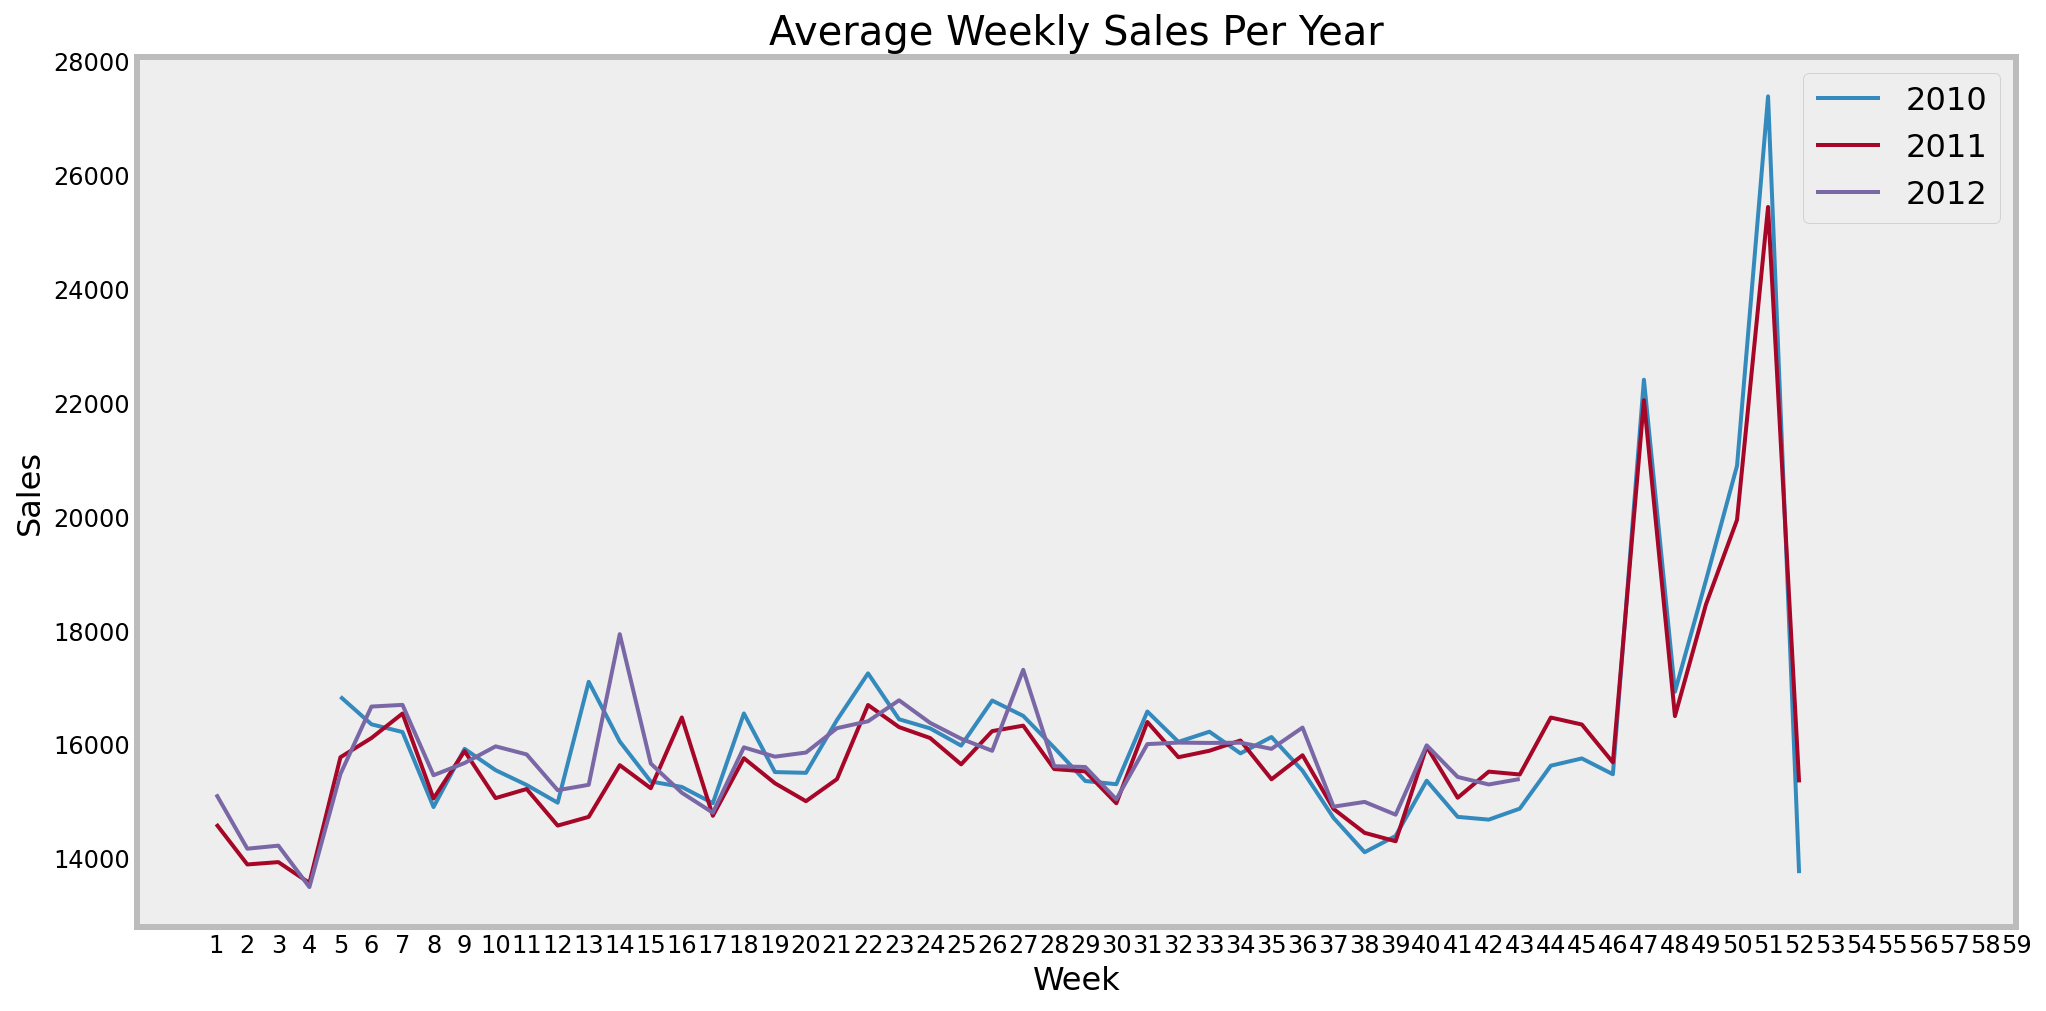

In [ ]:
# Plotting the above three plot together 
plt.figure(figsize=(15,8))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1,60, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales Per Year', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

Note :
As we can see, there is one important Holiday not included in 'IsHoliday'. It's the Easter Day. It is always in a Sunday, but can fall on different weeks.

In 2010 is in Week 13

In 2011, Week 16

Week 14 in 2012

Week 13 in 2013 for Test set

So, we can change to 'True' these Weeks in each Year.

MULTIVARIATE ANALYSIS

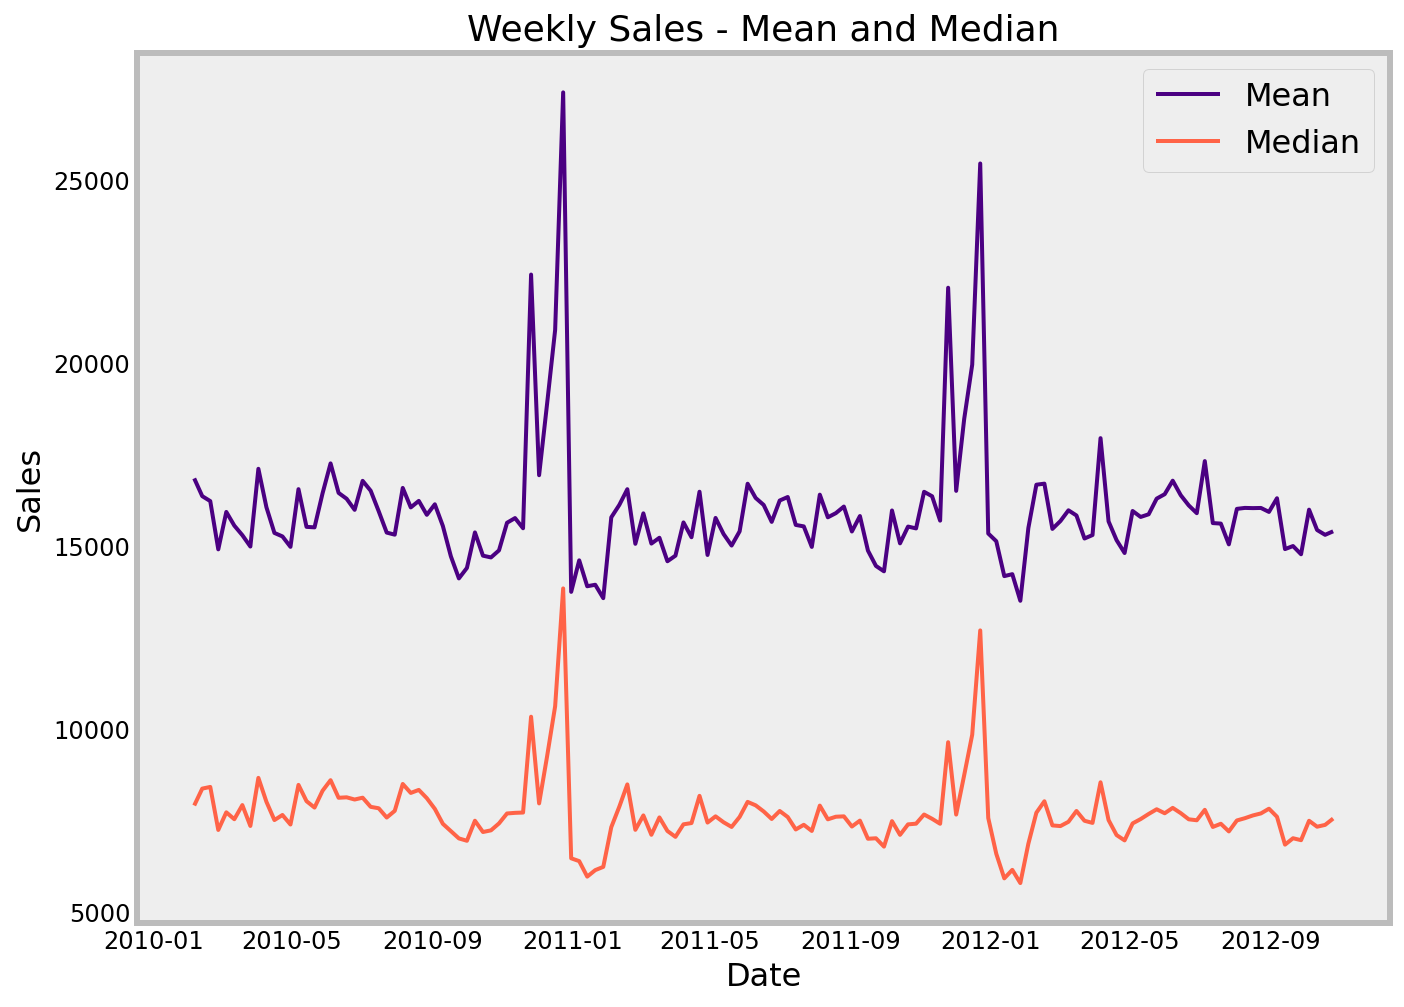

In [ ]:
weekly_sales_mean = train_data['Weekly_Sales'].groupby(train_data['Date']).mean()
weekly_sales_median = train_data['Weekly_Sales'].groupby(train_data['Date']).median()
plt.figure(figsize=(10,8))
sns.lineplot(weekly_sales_mean.index, weekly_sales_mean.values, color = 'indigo')
sns.lineplot(weekly_sales_median.index, weekly_sales_median.values, color = 'tomato')
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Weekly Sales - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

Plotting Average sales against department and against store

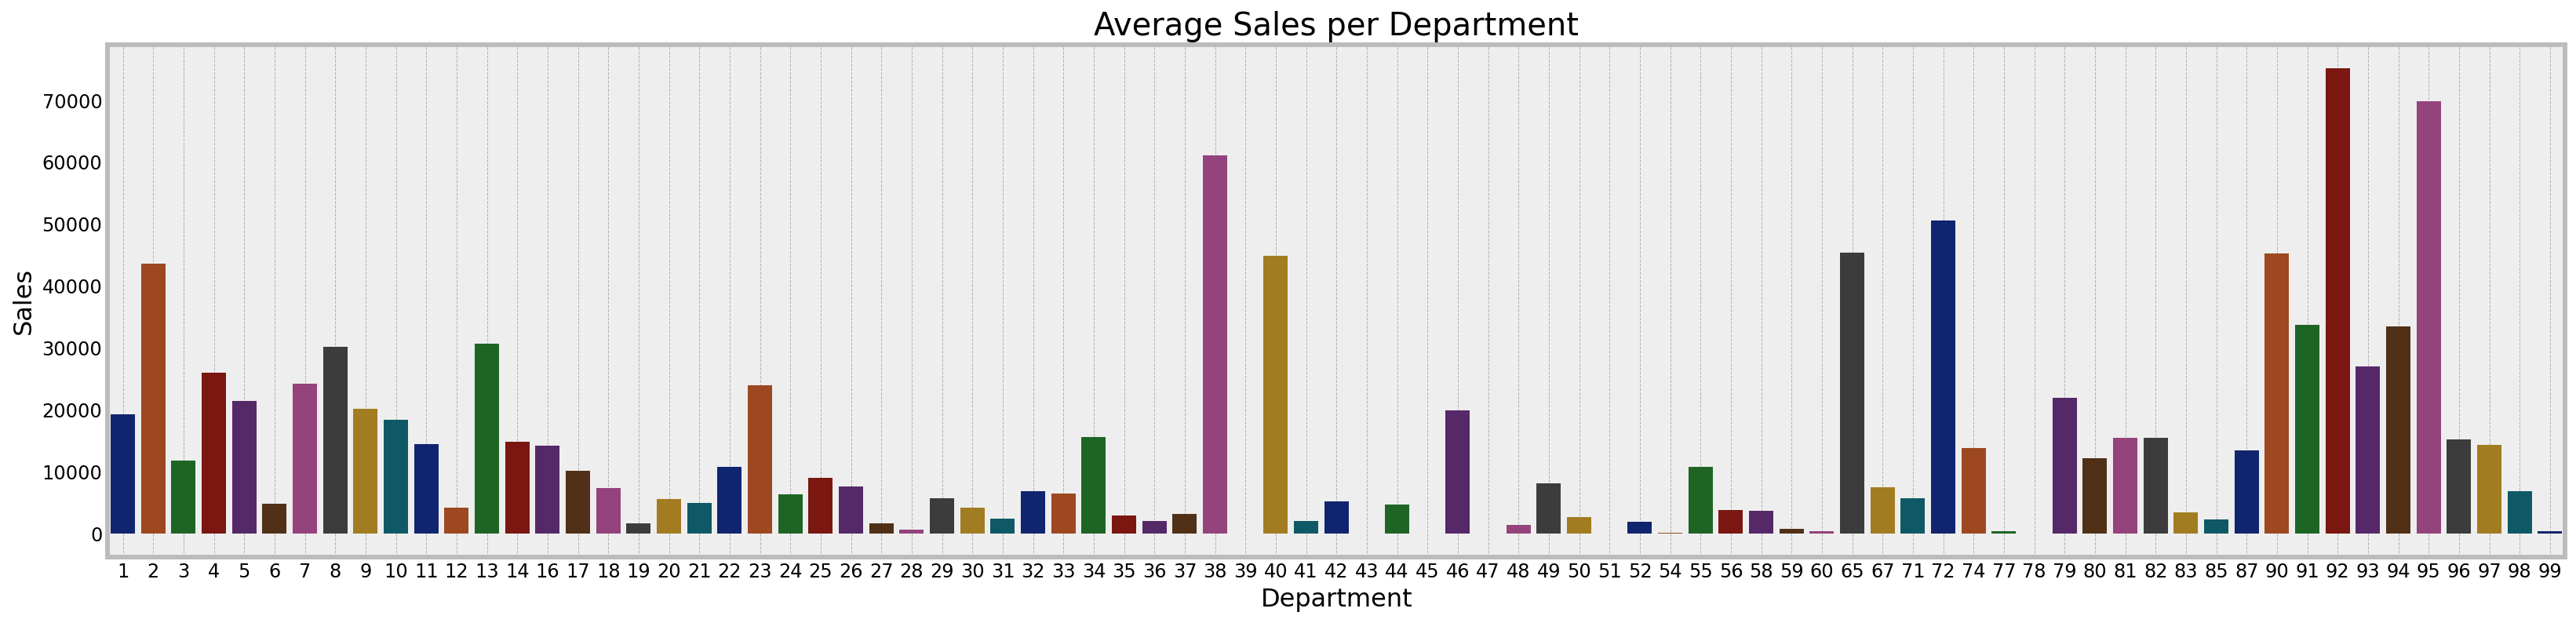

In [ ]:

# Average Sales per Department
weekly_sales =train_data['Weekly_Sales'].groupby(train_data['Dept']).mean()
plt.figure(figsize=(25,6))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales per Department', fontsize=20)
plt.xlabel('Department', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

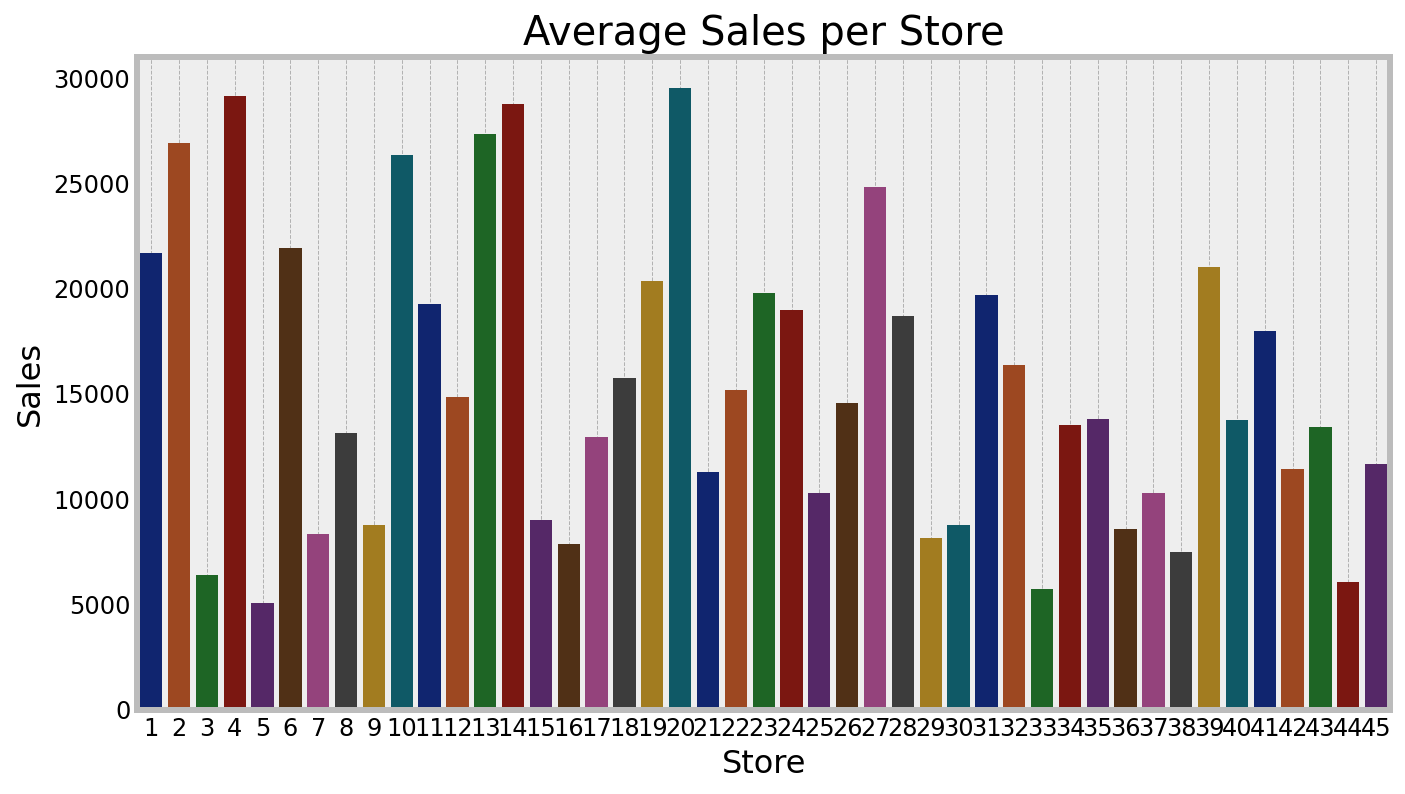

In [ ]:
# Average Sales per Store

weekly_sales = train_data['Weekly_Sales'].groupby(train_data['Store']).mean()
plt.figure(figsize=(10,6))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales per Store', fontsize=20)
plt.xlabel('Store', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

In [ ]:
df_weeks = train_data.groupby('Week').sum()
plt.figure(figsize = (5,5))
import plotly.express as px
fig = px.line( data_frame = df_weeks, x = df_weeks.index, y = 'Weekly_Sales', labels = {'Weekly_Sales' : 'Weekly Sales', 'x' : 'Weeks' }, title = 'Sales over weeks')
fig.update_traces(line_color='deeppink', line_width=3)

<Figure size 360x360 with 0 Axes>

In [ ]:
import plotly.graph_objs as go
from plotly import tools

fig = go.Figure()

#fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['Weekly_Sales'], name = 'Weekly Sales', mode = 'lines') )
fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown1'], name = 'MarkDown1', mode = 'lines') )
fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown2'], name = 'MarkDown2', mode = 'lines') )
fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown3'], name = 'MarkDown3', mode = 'lines') )
fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown4'], name = 'MarkDown4', mode = 'lines') )
fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown5'], name = 'MarkDown5', mode = 'lines') )

fig.update_layout(title = 'Sales vs Markdown', xaxis_title = 'Weeks')

Correlation Matrix

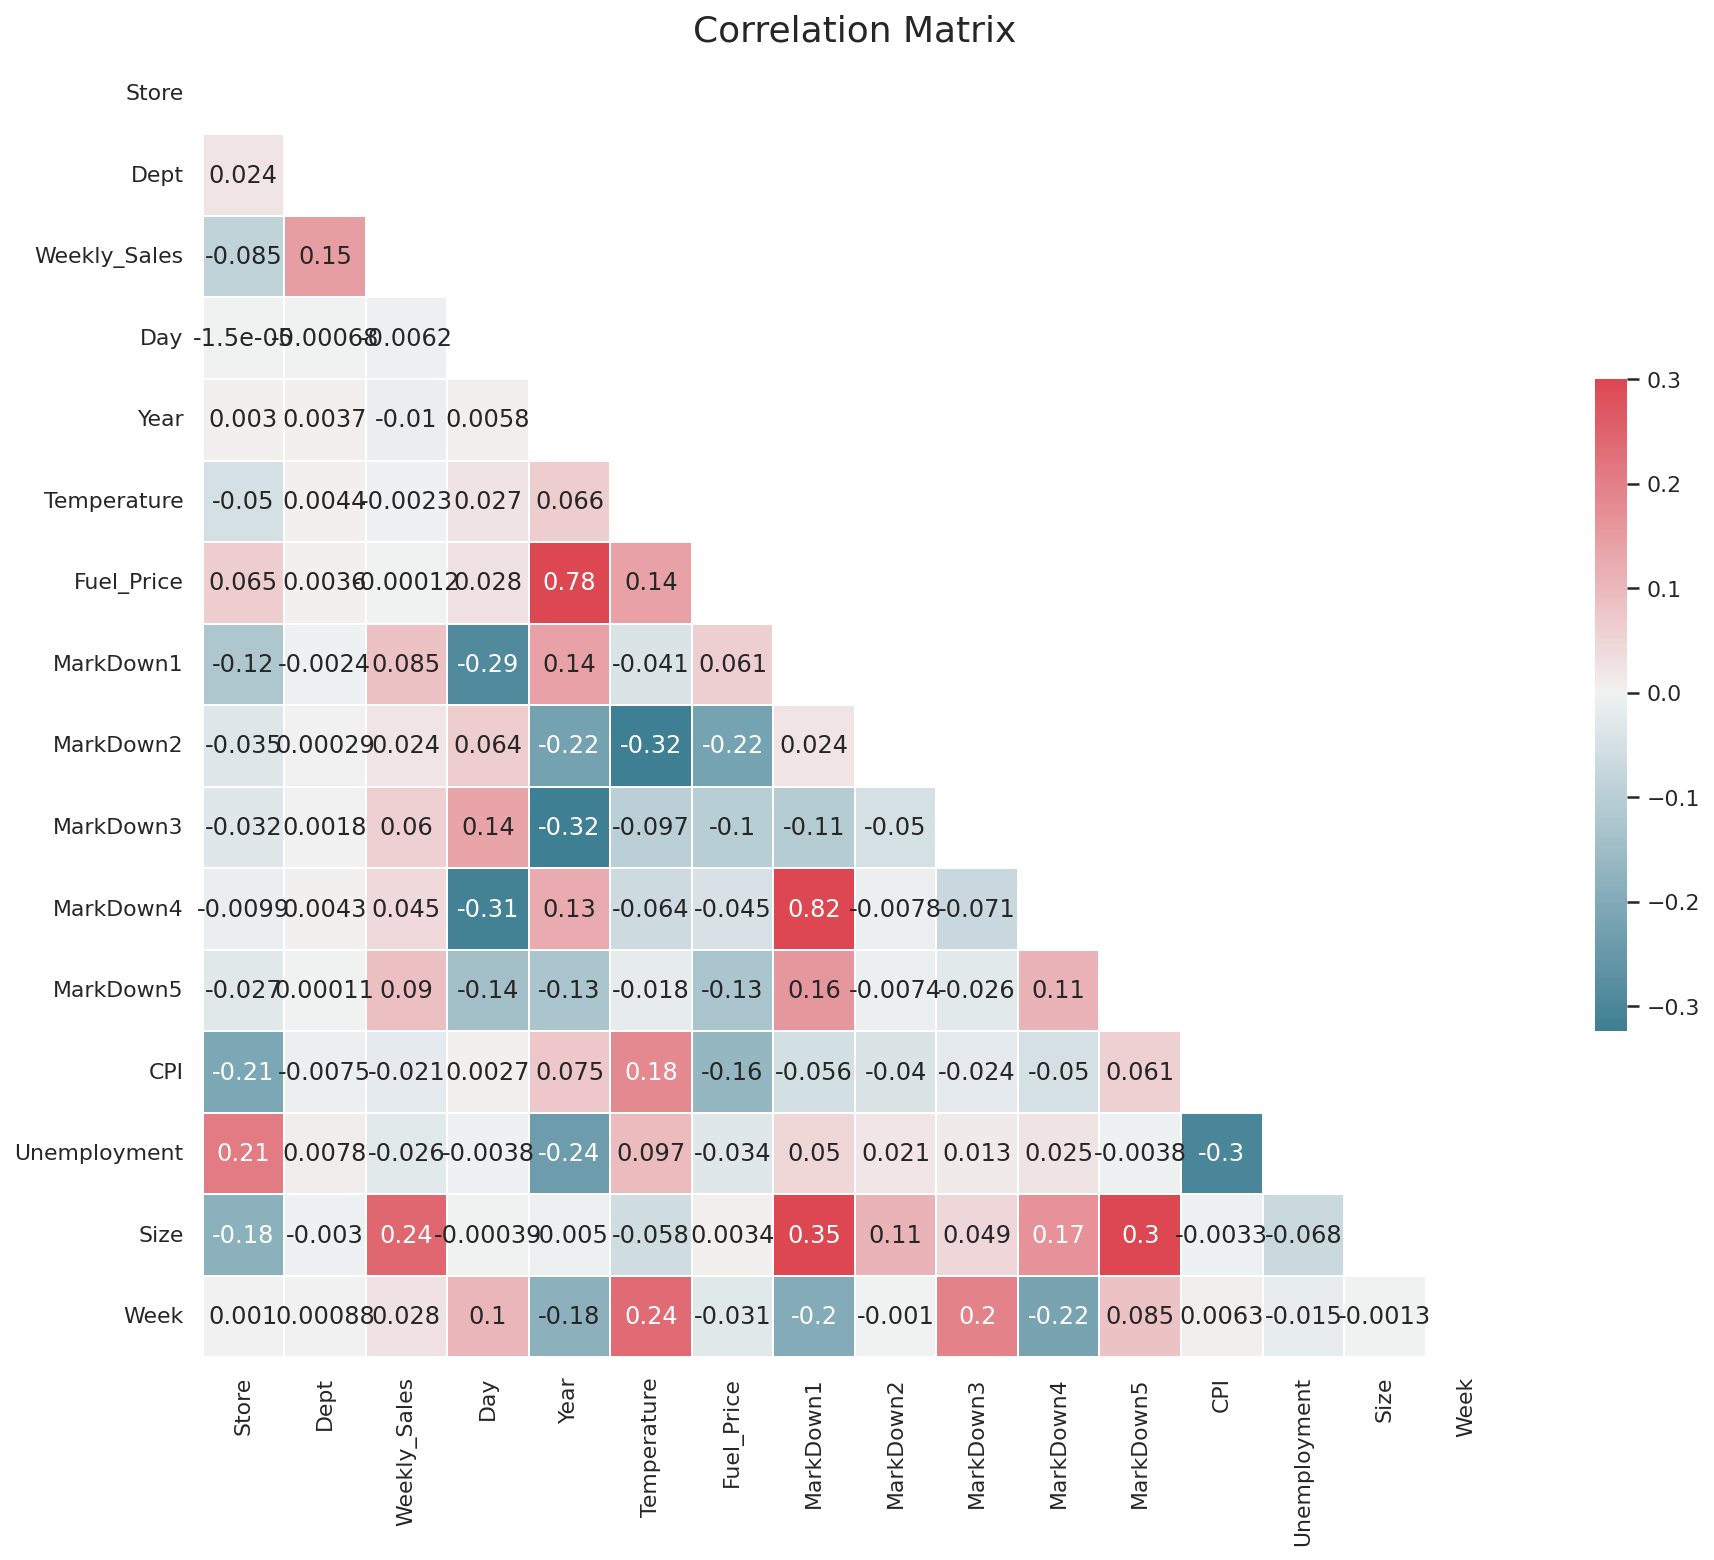

In [ ]:
sns.set(style = "white")

corr = train_data.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(14,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [ ]:
#Dropping down the variables that have weak correlation
#train_data = train_data.drop(columns=['Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
#test_data = test_data.drop(columns=['Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

In [ ]:
test_data.head(2)

,Store,Dept,Date,IsHoliday,Day,Month,Year,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week
0,1,1,2012-11-02,False,2,Nov,2012,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44
1,1,1,2012-11-09,False,9,Nov,2012,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315,45


In [ ]:
train_data.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Day,Month,Year,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week
0,1,1,2010-02-05,24924.50,False,5,Feb,2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
1,1,1,2010-02-12,46039.49,True,12,Feb,2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6


Checking the relationship of the other features with weekly sales

In [ ]:
plt.figure(figsize=(18,8))
sns.lineplot ( data = train_data, x = 'Size', y =  'Weekly_Sales', hue = 'IsHoliday');

In [ ]:
px.histogram(train_data, x='Temperature', y ='Weekly_Sales', color='IsHoliday', marginal='box')

In [ ]:
px.histogram(train_data, x='Fuel_Price', y ='Weekly_Sales', color='IsHoliday', marginal='box')

In [ ]:
px.histogram(train_data, x='CPI', y ='Weekly_Sales', color='IsHoliday')

SOME INSIGHTS FROM TRAINING DATASETS

1. Which store has maximum sales?

In [ ]:
max_sales = train_data.groupby('Store')['Weekly_Sales'].sum()
max_sales.idxmax()

In [ ]:
#plotting the max sales in the Bar chart
plt.figure(figsize=(15,5))
sns.barplot(x=train_data.Store, y = train_data.Weekly_Sales)

Store 20 has maximum Sales


2.In which store,sales vary a lot i.e. standard deviation is highest.
Will also find out coefficient of mean to standard deviation.

In [ ]:
# maximum Standard deviation
max_std = train_data.groupby('Store')['Weekly_Sales'].std()
max_std.idxmax()

Store 14 has maximum standard deviation.

3. Which store/s has good quarterly growth rate in Q3’2012 ?

In [ ]:
# Grouping data by year and month
growth = train_data.copy()
growth['Date'] = pd.to_datetime(growth.Date,format='%d-%m-%Y')
growth['Year'] = growth['Date'].dt.year
growth['Month'] = growth['Date'].dt.month
growth.head(5)

In [ ]:
# Group data with year = 2012
growth_rate = growth.groupby('Year')
growth_rate_2012 = growth_rate.get_group(2012)
growth_rate_2012.head()

In [ ]:
# Getting data for 4 quaters for year 2012

growth_rate_2012_Quaters = growth_rate_2012.groupby('Month')
growth_rate_2012_Q1_1 = growth_rate_2012_Quaters.get_group(1)
growth_rate_2012_Q1_2 = growth_rate_2012_Quaters.get_group(2)
growth_rate_2012_Q1_3 = growth_rate_2012_Quaters.get_group(3)

Quater_1 = growth_rate_2012_Q1_1.append(growth_rate_2012_Q1_2)
Quater_1 = Quater_1.append(growth_rate_2012_Q1_3) #Q1 data of 2012
display(Quater_1.head())  

growth_rate_2012_Q2_4 = growth_rate_2012_Quaters.get_group(4)
growth_rate_2012_Q2_5 = growth_rate_2012_Quaters.get_group(5)
growth_rate_2012_Q2_6 = growth_rate_2012_Quaters.get_group(6)

Quater_2 = growth_rate_2012_Q2_4.append(growth_rate_2012_Q2_5)
Quater_2 = Quater_2.append(growth_rate_2012_Q2_6)  #Q2 data of 2012
display(Quater_2.head())

growth_rate_2012_Q3_7 = growth_rate_2012_Quaters.get_group(7)
growth_rate_2012_Q3_8 = growth_rate_2012_Quaters.get_group(8)
growth_rate_2012_Q3_9 = growth_rate_2012_Quaters.get_group(9)
Quater_3 = growth_rate_2012_Q3_7.append(growth_rate_2012_Q3_8)
Quater_3 = Quater_3.append(growth_rate_2012_Q3_9)  #Q3 data of 2012
display(Quater_3.head())

# Q4 data of 2012
growth_rate_2012_Q4_10 = growth_rate_2012_Quaters.get_group(10)
Quater_4 = growth_rate_2012_Q4_10
display(Quater_4.head())

In [ ]:
# Grouping the data "Store" wise each Quarter

df2 = pd.DataFrame(Quater_1.groupby('Store')['Weekly_Sales'].sum())

df2["Quater1_Sales"] = pd.DataFrame(Quater_1.groupby('Store')['Weekly_Sales'].sum())
df2["Quater2_Sales"] = pd.DataFrame(Quater_2.groupby('Store')['Weekly_Sales'].sum())
df2["Quater3_Sales"] = pd.DataFrame(Quater_3.groupby('Store')['Weekly_Sales'].sum())
df2["Quater4_Sales"] = pd.DataFrame(Quater_4.groupby('Store')['Weekly_Sales'].sum())
df2.drop('Weekly_Sales', axis = 1, inplace = True)
df2

In [ ]:
# Growth rate formula- ((Present value — Past value )/Past value )*100

df2['Q3 - Q2'] = df2['Quater3_Sales'] - df2['Quater2_Sales']
df2['Overall Growth Rate in 2012 Q3 %'] = (df2['Q3 - Q2']/df2['Quater2_Sales'])*100

df2['Overall Growth Rate in 2012 Q3 %'].idxmax() # Store which has good growth in Q3-2012


In [ ]:
# Plotting the data in Bar chart
plt.figure(figsize=(15,5))
sns.barplot(x=df2.index, y = 'Overall Growth Rate in 2012 Q3 %', data = df2)

Store 7 has good growth in Q3-2012

4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [ ]:
#finding the mean sales of non holiday and holiday 
train_data.groupby("IsHoliday")['Weekly_Sales'].mean()

In [ ]:
# Marking the holiday dates 
train_data['Date'] = pd.to_datetime(train_data['Date'])

Christmas1 = pd.Timestamp(2010,12,31)
Christmas2 = pd.Timestamp(2011,12,30)
Christmas3 = pd.Timestamp(2012,12,28)
Christmas4 = pd.Timestamp(2013,12,27)

Pushkar_Camel_Fair1=pd.Timestamp(2010,11,26)
Pushkar_Camel_Fair2=pd.Timestamp(2011,11,25)
Pushkar_Camel_Fair3=pd.Timestamp(2012,11,23)
Pushkar_Camel_Fair4=pd.Timestamp(2013,11,29)

ganesh_festival1=pd.Timestamp(2010,9,10)
ganesh_festival2=pd.Timestamp(2011,9,9)
ganesh_festival3=pd.Timestamp(2012,9,7)
ganesh_festival4=pd.Timestamp(2013,9,6)

kala_ghoda_festival1=pd.Timestamp(2010,2,12)
kala_ghoda_festival2=pd.Timestamp(2011,2,11)
kala_ghoda_festival3=pd.Timestamp(2012,2,10)
kala_ghoda_festival4=pd.Timestamp(2013,2,8)

#Calculating the mean sales during the holidays
Christmas_mean_sales=train_data[(train_data['Date'] == Christmas1) | (train_data['Date'] == Christmas2) | (train_data['Date'] == Christmas3) | (train_data['Date'] == Christmas4)]
Pushkar_Camel_Fair_mean_sales=train_data[(train_data['Date'] == Pushkar_Camel_Fair1) | (train_data['Date'] == Pushkar_Camel_Fair2) | (train_data['Date'] == Pushkar_Camel_Fair3) | (train_data['Date'] == Pushkar_Camel_Fair4)]
ganesh_festival_mean_sales=train_data[(train_data['Date'] == ganesh_festival1) | (train_data['Date'] == ganesh_festival2) | (train_data['Date'] == ganesh_festival3) | (train_data['Date'] == ganesh_festival4)]
kala_ghoda_festival_mean_sales=train_data[(train_data['Date'] == kala_ghoda_festival1) | (train_data['Date'] == kala_ghoda_festival2) | (train_data['Date'] == kala_ghoda_festival3) | (train_data['Date'] == kala_ghoda_festival4)]
Christmas_mean_sales

list_of_mean_sales = {'Christmas_mean_sales' : round(Christmas_mean_sales['Weekly_Sales'].mean(),2),
'Pushkar_Camel_Fair_mean_sales': round(Pushkar_Camel_Fair_mean_sales['Weekly_Sales'].mean(),2),
'ganesh_festival_mean_sales' : round(ganesh_festival_mean_sales['Weekly_Sales'].mean(),2),
'kala_ghoda_festival_mean_sales':round(kala_ghoda_festival_mean_sales['Weekly_Sales'].mean(),2),
'Non holiday weekly sales' : round(train_data[train_data['IsHoliday'] == 0 ]['Weekly_Sales'].mean(),2)}
list_of_mean_sales

"Pushkar_Camel_Fair Day" has much high sale than mean sales in Non-Holiday season

5. Provide a monthly and semester view of sales in units and give insights

In [ ]:
#Monthly sales 
monthly = train_data.groupby(pd.Grouper(key='Date', freq='1M')).sum() # groupby each 1 month
monthly=monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,5))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')

# Analysis- highest sum of sales is recorded in between jan-2011 to march-2011.

In [ ]:
#Semester Sales 
Semester = train_data.groupby(pd.Grouper(key='Date', freq='6M')).sum()
Semester = Semester.reset_index()
fig, ax = plt.subplots(figsize=(10,5))
X = Semester['Date']
Y = Semester['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')

# ANalysis- sales are lowest in beginning of 1st sem of 2010 and 1st sem of 2013

1 PREPROCESSING

In [ ]:
train.head(5)

In [ ]:
test.head(5)

In [ ]:
train.info()

In [ ]:
test.info()

In [ ]:
# changing datatype to datetime format
train['Date']=pd.to_datetime(train['Date'])
test['Date']=pd.to_datetime(test['Date'])

2.INDEXING WITH TIME SERIES DATA

In [ ]:
# set the dates as the index of the dataframe, so that it can be treated as a time-series dataframe
train.set_index('Date',inplace=True)
test.set_index('Date',inplace=True)

In [ ]:
train.head(5)

3.VISUALISING SALES TIME SERIES DATA

In [ ]:
# extract out the time-series
sales=train.groupby('Date')['Weekly_Sales'].sum()
sales.head()

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(sales)
plt.xlabel('Years')
plt.ylabel('Weekly_Sales')

In [ ]:
sales_mean=sales.rolling(window=12).mean().round(4)
sales_std=sales.rolling(window=12).std().round(4)
print(sales_mean,sales_std)

In [ ]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(sales.index, sales, label='Original')
axes[0][0].plot(sales.index, sales.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Weekly Sales")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(sales.index, sales, label='Original')
axes[0][1].plot(sales.index, sales.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Weekly Sales")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(sales.index, sales, label='Original')
axes[1][0].plot(sales.index, sales.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Weekly Sales")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(sales.index, sales, label='Original')
axes[1][1].plot(sales.index, sales.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Weekly Sales")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

As we could see in the above plots, 12-month moving average could produce a more wrinkle free curve as desired. This on some level is expected since we are using month-wise data for our analysis and there is expected monthly-seasonal effect in our data.

Let's plot the rolling mean and standard deviation on window of 12 months.

Step 1.2: Seasonality – Time Series Decomposition

The first thing to do is to see how weekly sales vary on a month basis. We will plot a stacked annual plot to observe seasonality in our data.

In [ ]:
train.head(5)

In [ ]:
train.Month.unique()

In [ ]:
monthdict={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}


In [ ]:
def month2num(month):
  return monthdict[month]


In [ ]:
train['Month'] = train['Month'].apply(month2num)
train.head(5)

In [ ]:
monthly_sales = pd.pivot_table(train, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales = monthly_sales.reindex(index = [1,2,3,4,5,6,7,8,9,10,11,12])
monthly_sales

In [ ]:
monthly_sales.plot()

Important Inferences: June,November and December are the peak months for weekly sales and the variance and the mean value in June,November and December are also much higher than any of the other months.

We can see a seasonal cycle of 12 months where the mean value of each month starts with a decreasing trend in the beginning of the year and increases towards the end of the year. We can see a seasonal effect with a cycle of 12 months.

Step 1.3: Irregular Remainder – Time Series Decomposition

In [ ]:
decomposition = sm.tsa.seasonal_decompose(sales, extrapolate_trend=8)
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of additive time series')
plt.show()

In [ ]:
decomp_output = pd.DataFrame(pd.concat([decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid], axis=1))

In [ ]:
decomp_output.columns = ['observed', 'Trend', 'Seasonal', 'Irregular']

In [ ]:
decomp_output['TSI'] = decomp_output.Trend*decomp_output.Seasonal*decomp_output.Irregular
decomp_output.head()

#4TIME SERIES FORECASTING WITH ARIMA

Stationary Data for ARIMA models

Dickey-Fuller Test

Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.

In [ ]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(sales)

In [ ]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Though the variation in standard deviation is small, rolling mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way less than the critical values.

As we observed while plotting the moving average over months that there is a monhly pattern, now, let’s decipher the seasonal component.

In [ ]:
plt.plot(sales)

In [ ]:
sales_log = np.log10(sales)
plt.plot(sales_log)

In [ ]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_log)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

In [ ]:
sales.diff(1).head()

In [ ]:
sales_diff1 = sales.diff(1)
sales_diff1.dropna(inplace=True)

In [ ]:
plt.plot(sales_diff1)

In [ ]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

In [ ]:
sales_log_diff1 = sales_log.diff(1)
sales_log_diff1.dropna(inplace=True)
plt.plot(sales_log_diff1)

In [ ]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_log_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

In [ ]:
sales_log_diff2 = sales_log.diff(2)
sales_log_diff2.dropna(inplace=True)

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_log_diff2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(sales_log_diff2)

The following are some of our key observations from this analysis: 1) Trend: 12-months moving average looks quite similar to a straight line hence we could have easily used linear regression to estimate the trend in this data. 2) Seasonality: As discussed, seasonal plot displays a fairly consistent month-on-month pattern. The monthly seasonal components are average values for a month after removal of trend. Trend is removed from the time series using the following formula:

Seasonalityt×Remaindert=YtTrendt

3) Irregular Remainder (random): is the residual left in the series after removal of trend and seasonal components. Remainder is calculated using the following formula:

Remaindert=YtTrendt×Seasonalityt The expectations from remainder component is that it should look like a white noise i.e. displays no pattern at all. However, for our series residual display some pattern with high variation on the edges of data i.e. near the beginning (2011-2012) and the end (2011-2012) of the series.

**4.Arima modelling**

Step 2: Difference data to make data stationary on mean (remove trend)

Clearly the tractor sales has an upward trend for weekly sales and there is also a seasonal component that we have already analyzed.

The next thing to do is to make the series stationary by removing the upward trend through 1st order differencing of the series using the following formula:

1st Differencing (d=1) | Y′t=Yt−Yt−1

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(18)
fig.set_figheight(6)
smt.graphics.plot_acf(sales_log_diff2, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_log_diff2, lags=30, ax=axes[1], alpha=0.5,method='ols')
plt.tight_layout()

**#5: Identification of best fit ARIMA model**

In [ ]:
model = sm.tsa.statespace.SARIMAX(sales_log_diff2, order = (1,0,1), seasonal_order= (1,0,0,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

In [ ]:
results = model.fit()
print(results.summary())

**5.1Iterate the process to find the best values for p, d, q and P, D, Q**

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 2)
d = range(0,2)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [ ]:
pdq


In [ ]:
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,2)
P = Q = range(0, 2) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
seasonal_pdq

In [ ]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

**5.2: Predict sales on in-sample date usinlg the best fit ARIMA model**

The next step is to predict weekly sales for in-sample data and find out how close is the model prediction on the in-sample data to the actual truth.

In [ ]:
best_model = sm.tsa.statespace.SARIMAX(sales_log,
                                      order=(1, 1, 1),
                                      seasonal_order=(0, 0, 0, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()

In [ ]:
print(best_results.summary().tables[0])

In [ ]:

print(best_results.summary().tables[1])

In [ ]:
sales

In [ ]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-09-14'), full_results=True)

In [ ]:
pred_dynamic.predicted_mean

In [ ]:
forecast=np.power(10, pred_dynamic.predicted_mean)

In [ ]:
actual = sales['2012-09-14':]
actual

In [ ]:
#Mean absolute percentage error
MAPE_last1year = np.mean(np.abs(actual - forecast)/actual)

In [ ]:
print('The Mean Absolute percentage error of our forecast for last two years is {}'.format(round(MAPE_last1year, 4)))

#6RUNMODEL DIAGNOSTICS -TO INVSTIGATE ANY UNUSUAL BEHAVIOUR

In [ ]:
#6
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

**#7VALIDATING FORCASTS MSE AND RMSE**

In [ ]:
#7
# Compute the mean square error
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

In [ ]:
np.power(10, best_results.forecast(steps=12))

**Step 8: Forecast sales using the best fit ARIMA model**

The next step is to predict weekly sales for next 3 years i.e. for 2013, 2014, and 2015 through the above model.

In [ ]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [ ]:
pred_ci_99.head()

In [ ]:
pred_ci_95.head()

In [ ]:
n_steps = 36
idx = pd.date_range(sales.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [ ]:
fc_95.head()

In [ ]:
fc_99.head()

In [ ]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

**FROM NOW 24 REPORT**

In [ ]:
pd.plotting.register_matplotlib_converters()

In [ ]:
# plot the forecast along with the confidence band
axis = sales.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Weekly Sales')
plt.legend(loc='best')
plt.show()

Single Exponential Smoothing

In [ ]:
### single exponential smoothing/ ETS
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# initialise model
ets_model = ExponentialSmoothing(sales, trend='add', seasonal='add', seasonal_periods=12)
#ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
ets_fit = ets_model.fit(optimized=True)

In [ ]:
# forecast p months ahead
p_ahead = 36
yh = ets_fit.forecast(p_ahead)

In [ ]:
# plot the y, y_smoothed and y_hat ts'
plt.plot(sales, label='Weekly_Sales')
plt.plot(ets_fit.fittedvalues, label='y_smooth')
plt.plot(yh, label='y_hat')

plt.legend()
plt.show()

**9 )DATA EXPLORATION**
#1 Visualising corelation

In [ ]:
corr = train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

Encoding Store Column

In [ ]:
def onehot_encode(train, column, prefix):
    df = train.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [ ]:
data = onehot_encode(train, column='Store', prefix='store')

Splitting/Scaling

In [ ]:
data["IsHoliday"] = data["IsHoliday"].astype(int)
data.head(2)

In [ ]:
data.info()

In [ ]:
y = data['IsHoliday'].copy()
X = data.drop('IsHoliday', axis=1).copy()


In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Modeling and Training

In [ ]:
log_model = LogisticRegression()
svm_model = SVC()
dec_model = DecisionTreeClassifier()

In [ ]:
log_model.fit(X_train, y_train)
dec_model.fit(X_train, y_train)
print("Models trained.")


In [ ]:
print("   Logistic Regression Accuracy:", log_model.score(X_test, y_test))
print("         Decision Tree Accuracy:", dec_model.score(X_test, y_test))
#interpretation remaining


10 DATA EXPLORATION
2)WEEKLY SALES AFFECTED WITH TEMPERATURE


#11Timeseries Forecasting using FBProphet



In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
train=train.groupby('Date')[['Weekly_Sales']].sum()

In [ ]:
train['ds'] = train.index
train.head()

In [ ]:
train = train[['ds', 'Weekly_Sales']].rename(columns={'ds': 'ds', 'Weekly_Sales': 'y'})

In [ ]:
sales_model = Prophet(seasonality_mode='additive',interval_width=0.95)
sales_model.fit(train)

#12 PREDICTING FORECASTS

In [ ]:
sales_forecast = sales_model.make_future_dataframe(periods=36, freq='MS')
sales_forecast = sales_model.predict(sales_forecast)
sales_forecast.head(2)

In [ ]:
plt.figure(figsize=(18, 6))
sales_model.plot(sales_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Weekly Sales');

#14
Trends and Patterns

we can use the Prophet Models to inspect different trends of these two categories in the data.

In [ ]:
sales_model.plot_components(sales_forecast);

Good to see that the weekly sales have been linearly increasing over time

The worst months for weekly sales are January,October. The best months for weekly sales are June,November and December.

**10) DATA EXPLORATION**

In [ ]:
train_data.info()

Insights:

Except for 'MarkDown' columns, there are no missing values for all other colunms. The MarkDown# columns represent Walmart clearance activities, which occurrs in different stores at different time. In this case, it is normal to see many NaN values in these columns.

Since we have 20 columns in total, we need to reduce the dimensionality using correlation matrix, which is only for numeric values, and the 'Type' column needs to be transferred.

In [ ]:
train_data['Type_trans'] = train_data['Type'].map({'A':1, 'B':2, 'C':3})
test_data['Type_trans'] = test_data['Type'].map({'A':1, 'B':2, 'C':3})

In [ ]:
plt.figure(figsize=(12,14))
sns.heatmap(train_data.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix', fontsize=30)
plt.show()

Insights:

The Tempeature, Fuel price, MarkDown#, CPI, Unemployment will be removed due to its low correlationship with Weekly sales, and the month, day columns will also be dropped because of the redundant information.

In [ ]:
model = train_data.drop(columns=['Temperature', 'Type', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
                'CPI', 'Unemployment', 'Date', 'Month', 'Day'])
test_merge_model = test_data.drop(columns=['Temperature', 'Type', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
                'CPI', 'Unemployment', 'Date', 'Month', 'Day'])

In [ ]:
X = model.drop(columns=['Weekly_Sales'])
y = model['Weekly_Sales']

Insights:

The range among different colunms varies a lot, so scaling the data is needed.

In [ ]:
scaler = MinMaxScaler().fit(X)
X_scaler = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_scaler, y, test_size=0.2, random_state=123)

Insights:

From the previous analysis, the 'IsHoliday' feature is important to the weekly sales, and we need to use WMAE (weighted mean absolute error) to evalute our model.

In [ ]:
def WMAE(data, prediction, actual):
    weights = data['IsHoliday'].apply(lambda x: 5 if x==1 else 1)
    return np.round(np.sum(weights*abs(prediction-actual))/weights.sum(), 2)

1. Linear regression

In [ ]:
#build the model
model1 = LinearRegression().fit(X_train, y_train)
#training error
linear_train_wmae = WMAE(X_train, model1.predict(X_train), y_train)
#validation error
y_pred = model1.predict(X_val)
linear_val_wmae = WMAE(X_val, y_pred, y_val)
#results
print('Training dataset WMAE is', linear_train_wmae)
print('Validation dataset WMAE is', linear_val_wmae)

Insights:

It seems that there is no noticeable variance between training dataset and validation dataset, and we continue to compare them with the Ridge model.

2. Ridge Regression

In [ ]:
model2 = Ridge().fit(X_train, y_train)
#train error
ridge_train_wmae = WMAE(X_train, model2.predict(X_train), y_train)

#validation error
y_pred = model2.predict(X_val)
ridge_val_wmae = WMAE(X_val, y_pred, y_val)

#results:
print('Training dataset WMAE is', ridge_train_wmae)
print('Validation dataset WMAE is', ridge_val_wmae)

Insights:

It shows that there is no need to worry about the overfitting problem.

3. Decision tree

In [ ]:
model3 = DecisionTreeRegressor(random_state=123).fit(X_train, y_train)
#train error
tree_train_wmae = WMAE(X_train, model3.predict(X_train), y_train)

#validation error
y_pred = model3.predict(X_val)
tree_val_wmae = WMAE(X_val, y_pred, y_val)

#results:
print('Training dataset WMAE is', tree_train_wmae)
print('Validation dataset WMAE is', tree_val_wmae)

In [ ]:
tree_importance = pd.DataFrame(np.transpose(model3.feature_importances_),
                               index=X_train.columns, columns=['Importance']).sort_values(by='Importance',
                                                                                          ascending=False)
                                                                                                           
tree_importance

Insights:

The department of a store contributes most to the change of weekly sales.

4. Random Forest

In [ ]:
model4 = RandomForestRegressor(random_state=123, n_jobs=-1).fit(X_train, y_train)
#train error
forest_train_wmae = WMAE(X_train, model3.predict(X_train), y_train)

#validation error
y_pred = model3.predict(X_val)
forest_val_wmae = WMAE(X_val, y_pred, y_val)

#results:
print('Training dataset WMAE is', forest_train_wmae)
print('Validation dataset WMAE is', forest_val_wmae)

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model4.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

Insights:

The reusults look similar to the DecisionTree model.

RandomForest Hyperparameter Tuning
There are many hyperparameters in RandomForest model, and these together influence the performance of the model. In this case, finding the best one from finite combinations is needed. And I choose 'n_estimators', 'max_depth', 'min_samples_split', 'max_features'.

In [ ]:
def test_params(**params):  
    model = RandomForestRegressor(random_state=123, n_jobs=-1, **params).fit(X_train, y_train)
    train_wmae = WMAE(X_train, y_train, model.predict(X_train))
    val_wmae = WMAE(X_val, y_val, model.predict(X_val))
    return train_wmae, val_wmae

In [ ]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_wmae, val_wmae = test_params(**params)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
    plt.figure(figsize=(16,8))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('WMAE')
    plt.legend(['Training', 'Validation'])
    

In [ ]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

In [ ]:
test_param_and_plot('n_estimators', [10, 30, 50, 70, 90, 100])

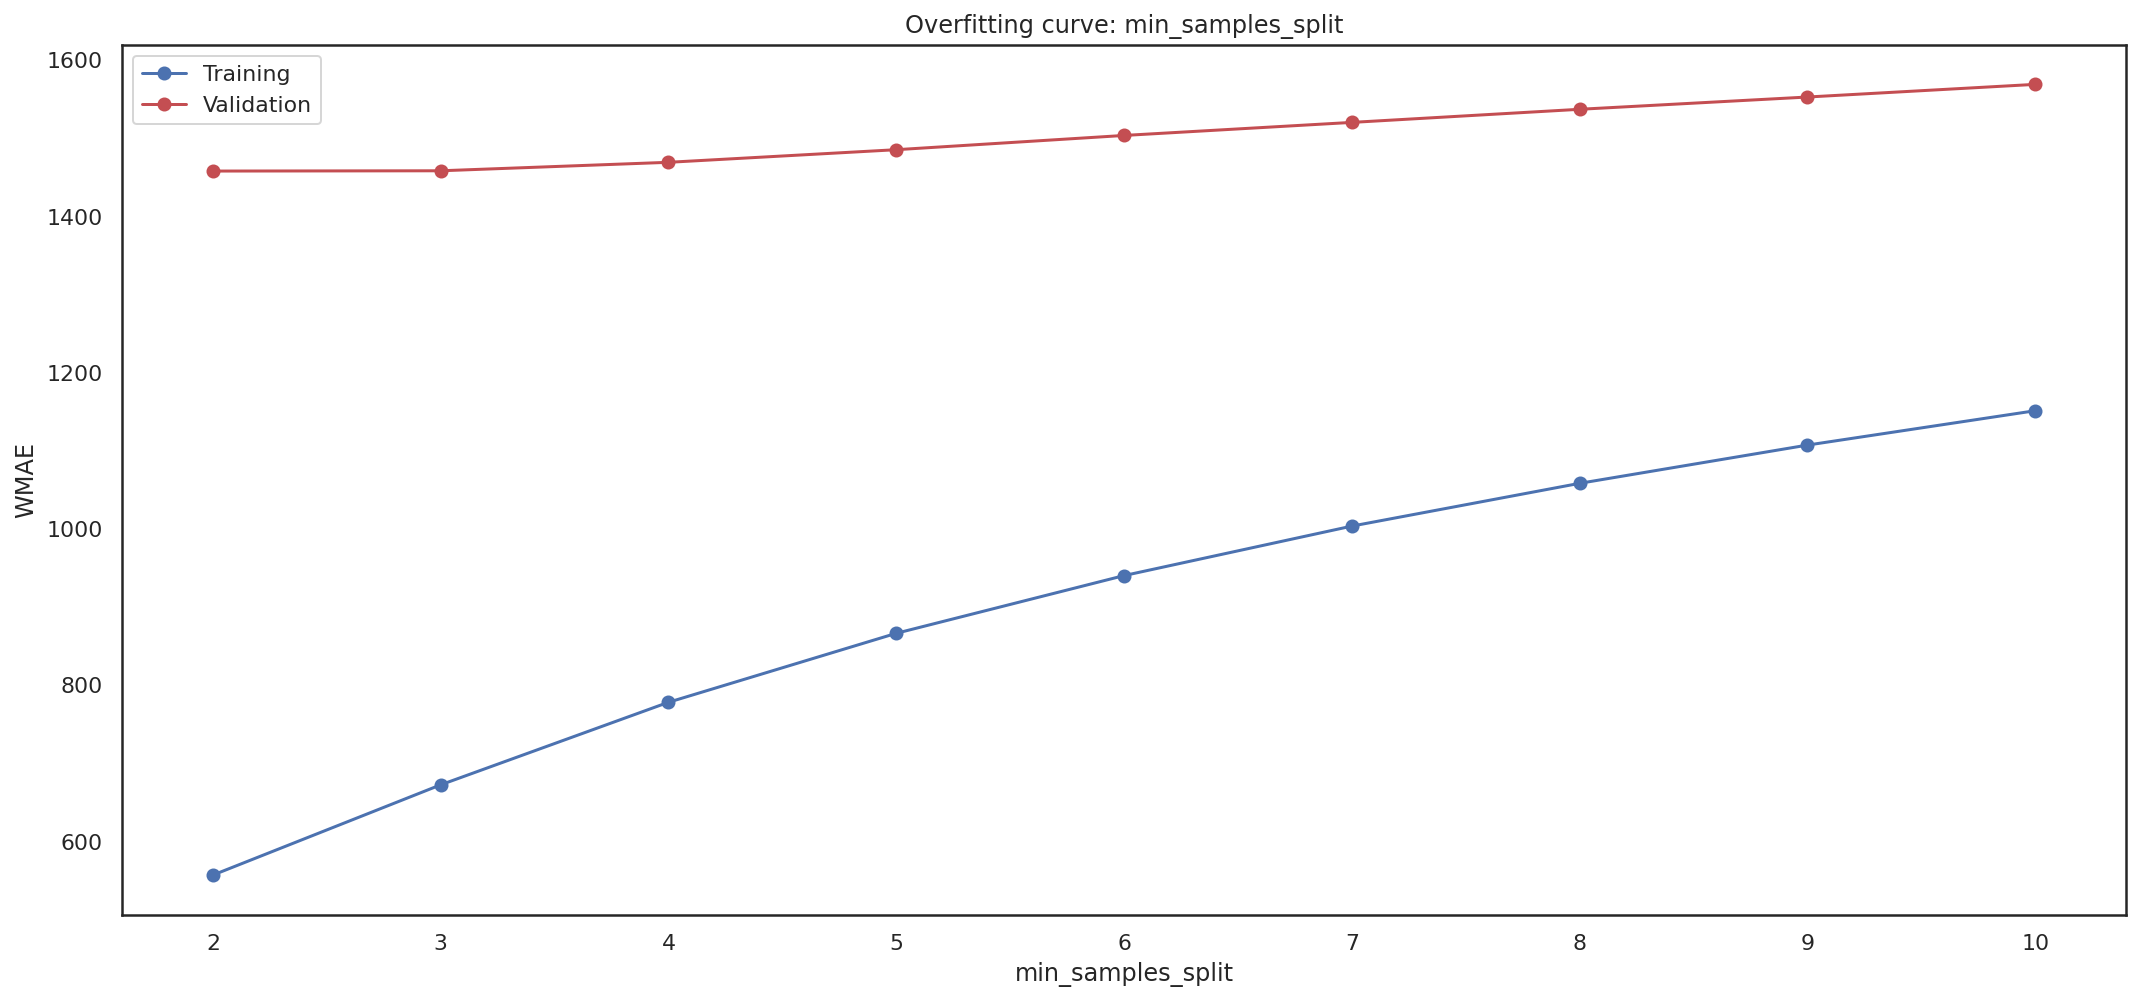

In [ ]:
test_param_and_plot('min_samples_split', [2, 3, 4, 5, 6, 7, 8, 9, 10])

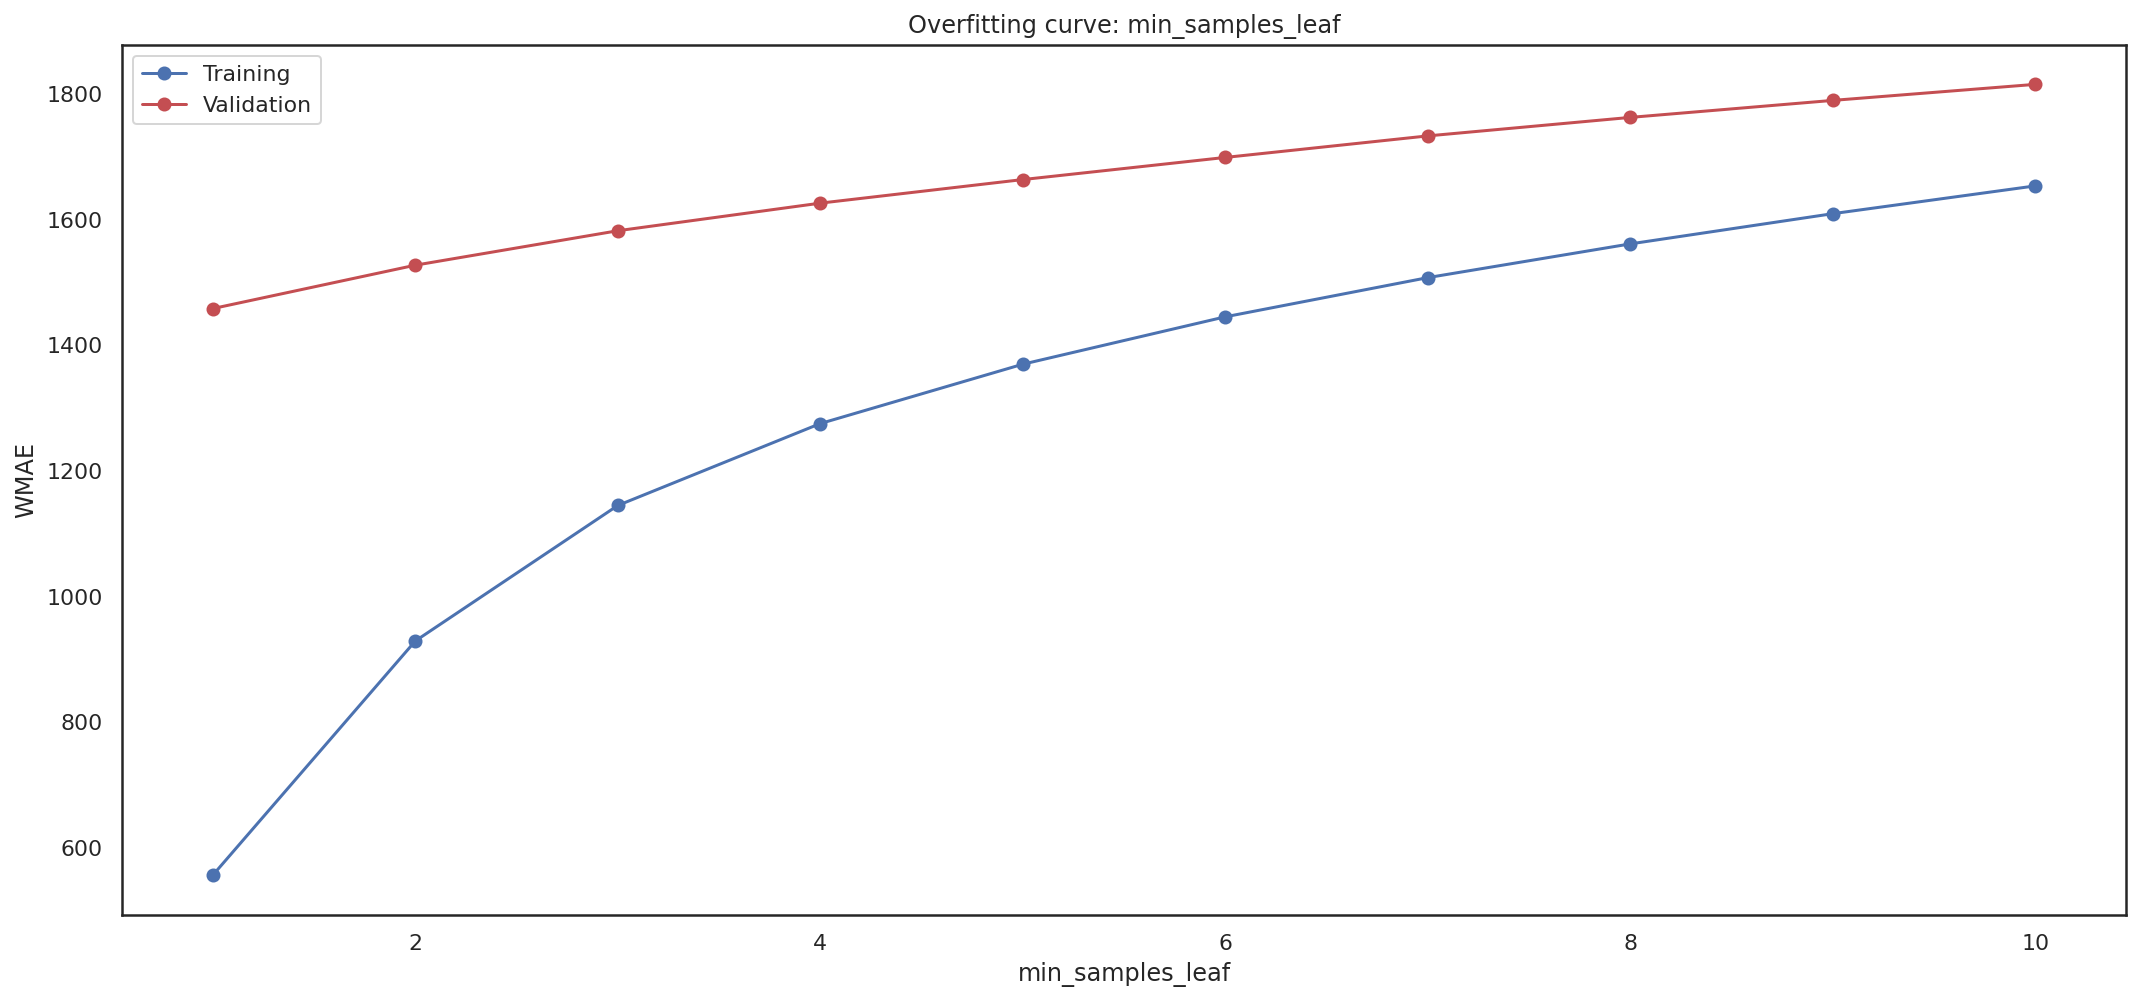

In [ ]:
test_param_and_plot('min_samples_leaf', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

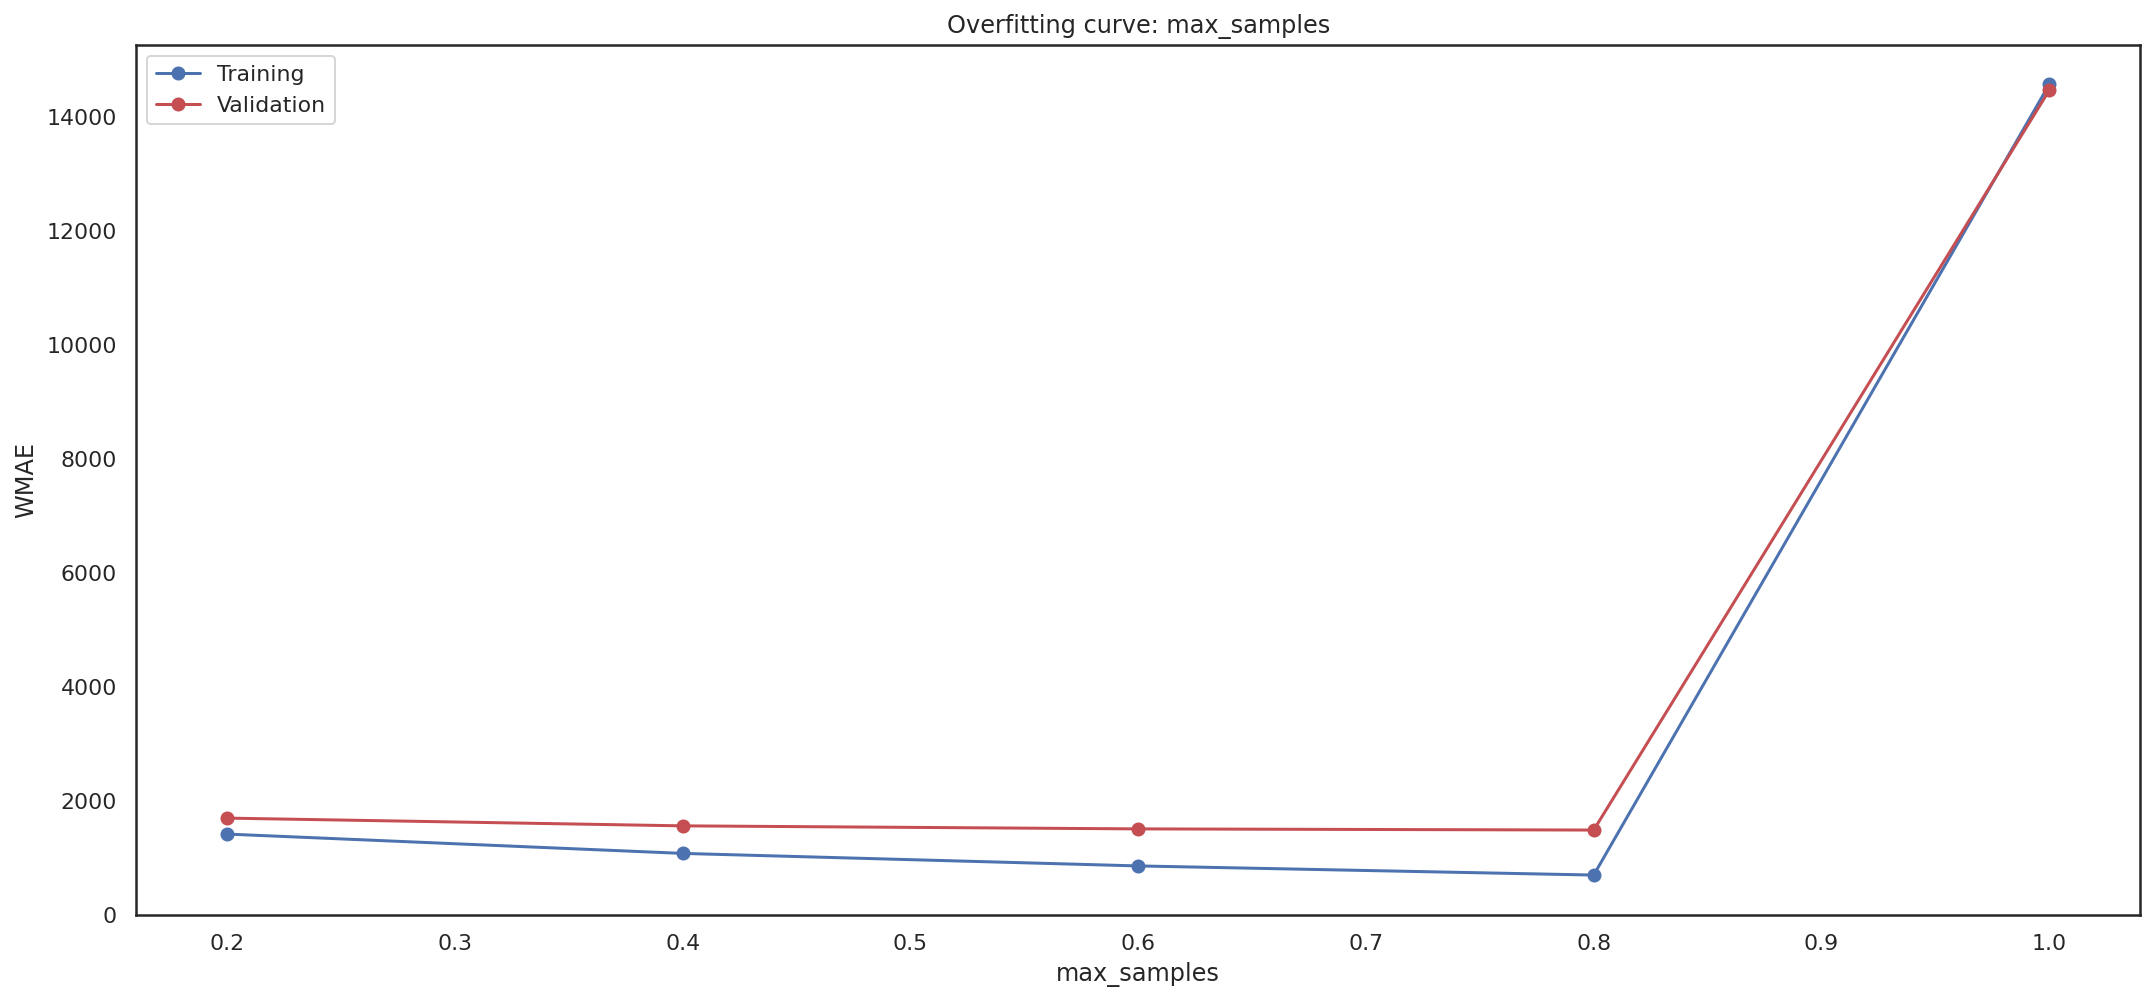

In [ ]:
test_param_and_plot('max_samples', [0.2, 0.4, 0.6, 0.8, 1])

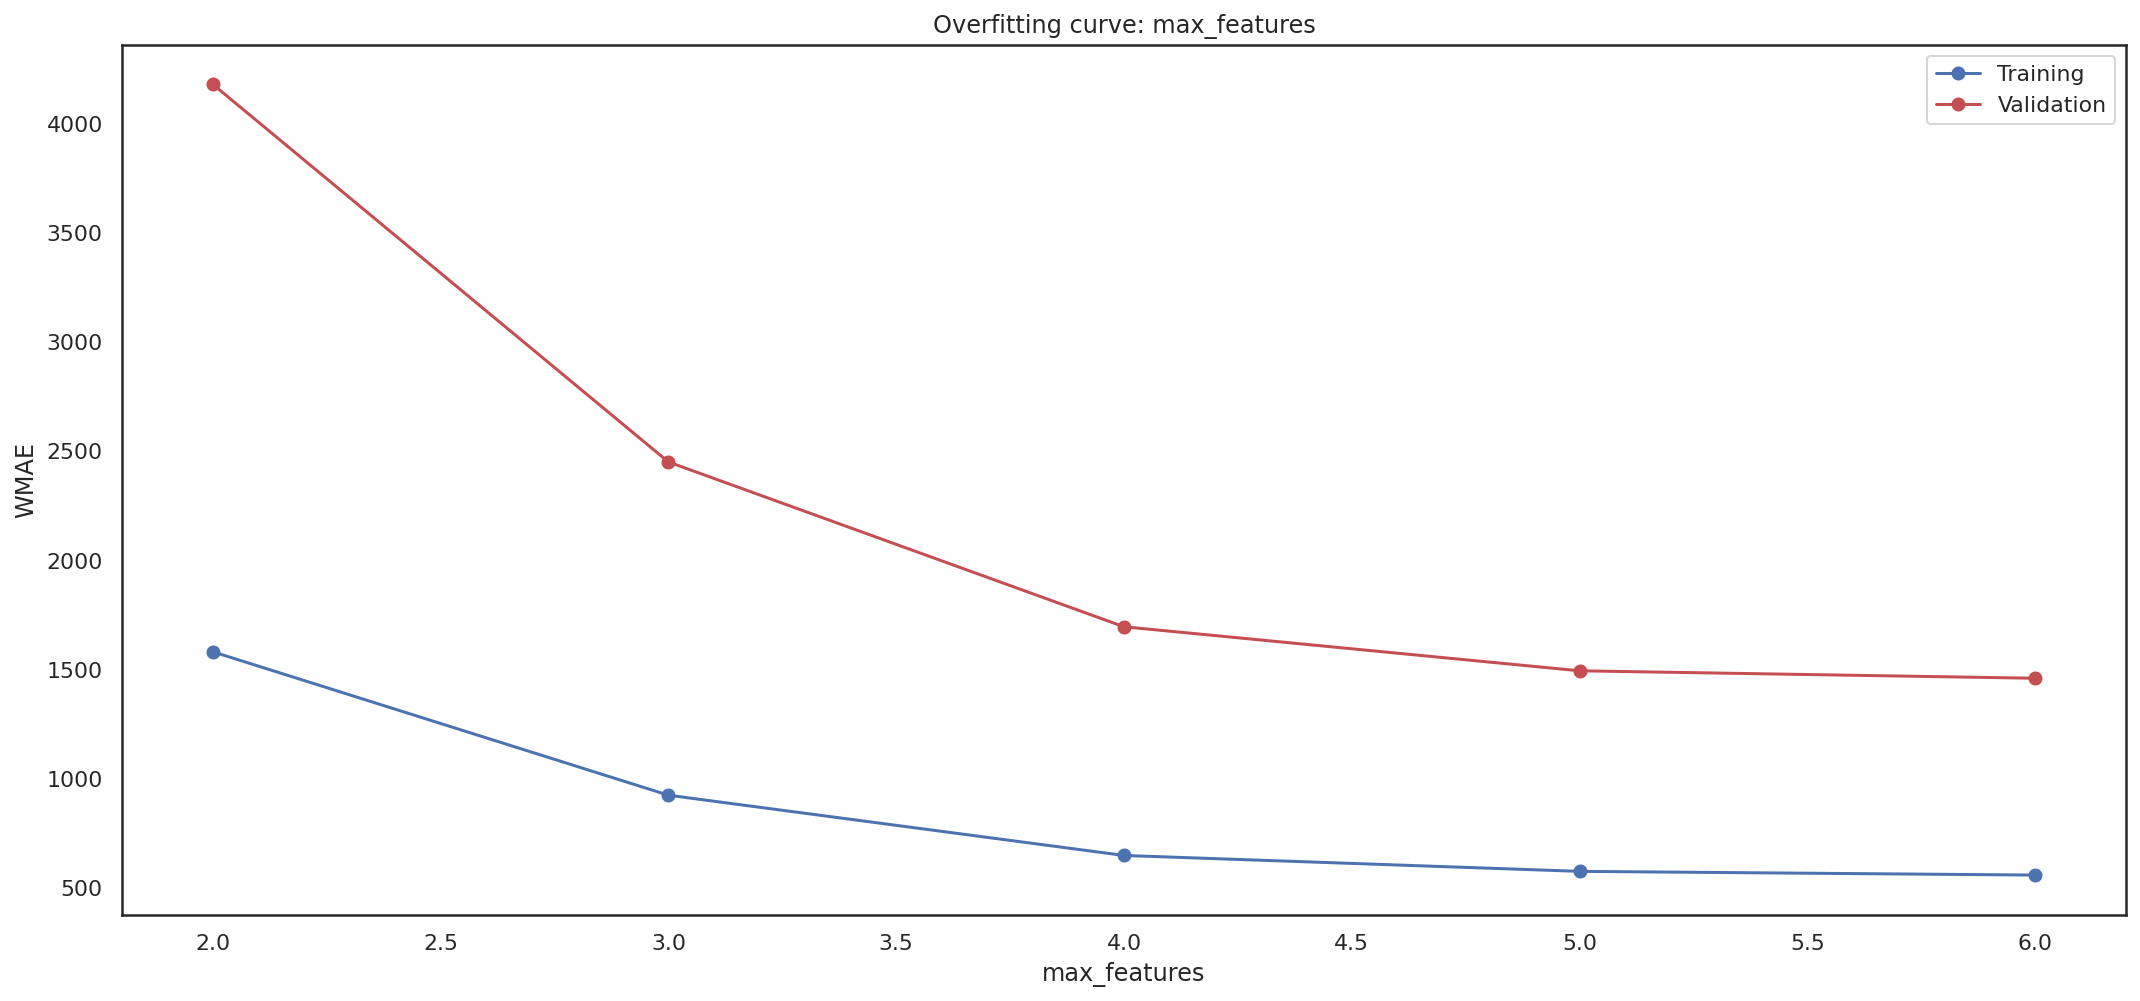

In [ ]:
test_param_and_plot('max_features', [2, 3, 4, 5, 6])

From the above testing of parameters, the follwoing values of parameters were found to be the best which minimizes the validation error.

max_depth: 25

n_estimators: 100

min_samples_split: 2

min_samples_leaf: 1

max_samples: 0.8

max_features: 6

In [ ]:
#Create the model
rf1 = RandomForestRegressor(max_depth=25, n_estimators=100, min_samples_split=2, min_samples_leaf=1, 
                            max_samples=0.8, max_features=6,  random_state=123)

# Fit the model
rf1.fit(X_train, y_train)

rf1_train_pred = rf1.predict(X_train)

# Compute WMAE on traing data
rf1_train_wmae = WMAE(X_train, y_train, rf1_train_pred)
print('The WMAE loss for the training set is  {}.'.format(rf1_train_wmae))

rf1_val_preds = rf1.predict(X_val)

# Compute WMAE on validation data
rf1_val_wmae = WMAE(X_val, y_val, rf1_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(rf1_val_wmae))

The WMAE loss for the training set is  711.35.
The WMAE loss for the validation set is  1472.84.


Insights:

The loss function value of validation dataset of this new RandomForest value is a little bit lower.

**4.MODEL COMPARISON** 

**Linear Regression**
Training dataset WMAE is 14839.38
Validation dataset WMAE is 14774.55

**Ridge Regression**
Training dataset WMAE is 14839.35
Validation dataset WMAE is 14774.52

**Decision Tree**
Training dataset WMAE is 0.0
Validation dataset WMAE is 1781.92

**Random Forest**
The WMAE loss for the training set is 711.43.
The WMAE loss for the validation set is 1471.64.

**5. Conclusions**
Following inferences and conclusions can be drawn from the the analysis of the data:

Type 'A' stores are more popular than 'B' and 'C' types.

Type 'A' stores outclass the 'B' and 'C' types in terms of size and the avergae weekly sales.

Weekly Sales are affected by the week of year. Holiday weeks witnessed more sales than the non-holiday weeks. Notables are Thanksgiving and Christmas weeks.

Size of the store is a major contributing factor in the weekly sales.

Sales are also dependent on the department of the store as different departments showed different levels of weekly sales.

Among the trained models for predicting the future sales, Grdient Boosting Machine with tuned hyperparameters performs the best.